# Results for 5 patients on 10D problem

Utility function: linear utility terms for chest wall and ribs, linear-quadratic utility terms for all other ROIs

Parameters: all dose parameters are tuned (except for PTV D95), with search space [1/4max,max].

The tables all percent difference values (i.e., percent difference from AcceptanceLevel and percent difference from approved plan).

In [6]:
import pickle
import sys

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
my_cmap = ListedColormap(sns.diverging_palette(220, 20, n=256).as_hex())
colors = sns.color_palette()

sys.path.append('../src')
import analyze
import raybay

In [16]:
folders = ['SBRT_lung_minsun', 'ZZ_MK_LLungSBRT3778', 'ZZ_MK_RLungSBRT4076',
           'ZZ_MK_RULungSBRT3796', 'ZZ_MK_LLLungSBRT3977']

In [51]:
def plotConvergenceA(folder, labels=True, legend=True):
    # Load data
    approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
    default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
    dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
    bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
    
    # Plot convergence
    plt.plot([0, 100], [raybay.get_utility(bayes.goal_df, approved.goal_dict)[0],
                       raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':', color=colors[1])
    plt.plot([0, 100], [raybay.get_utility(bayes.goal_df, default.goal_dict)[0],
                       raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':', color=colors[0])
    plt.plot(np.arange(1, 101), -np.minimum.accumulate(dummy.opt_result.func_vals), color=colors[4])
    plt.plot(np.arange(1, 101), -np.minimum.accumulate(bayes.opt_result.func_vals), color=colors[2])
    
    # Add labels
    if labels:
        plt.xlabel('Iteration ($t$)')
        plt.ylabel('Linear-Quadratic Utility ($g$)')
        if legend:
            plt.legend(['Clinical', 'Default', 'Random', 'Bayes'], loc='lower right')
    else:
        plt.xticks(ticks=np.arange(0, 101, 20), labels=[])
        plt.ylim(plt.ylim())
        plt.yticks(ticks=plt.yticks()[0], labels=[])
        if legend:
            plt.legend(['', '', '', ''], frameon=False, loc='lower right')

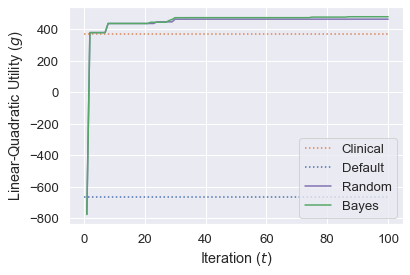

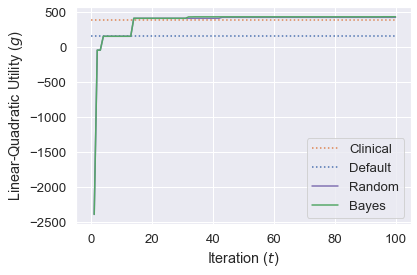

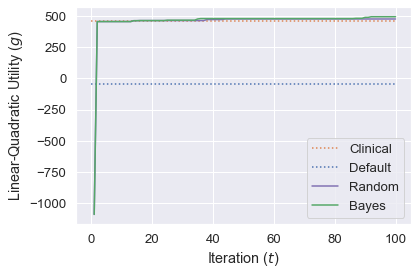

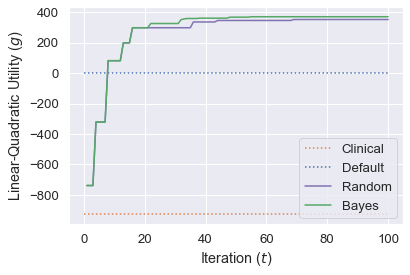

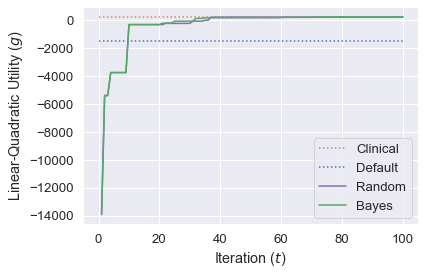

In [79]:
# Plot convergence (zoomed out)
for ii in range(len(folders)):
    plt.figure()
    plotConvergenceA(folders[ii])
    plt.savefig(f'fig5{chr(2*ii + 97)}.png', dpi=300, bbox_inches='tight')

In [76]:
def plotConvergenceB(folder, labels=True, legend=True, clinical=False):
    # Load data
    approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
    default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
    dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
    bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
    
    # Plot convergence
    if clinical:
        plt.plot([20, 100], [raybay.get_utility(bayes.goal_df, approved.goal_dict)[0],
                 raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':', color=colors[1])
    plt.plot(np.arange(20, 101), -np.minimum.accumulate(dummy.opt_result.func_vals)[19:], color=colors[4])
    plt.plot(np.arange(20, 101), -np.minimum.accumulate(bayes.opt_result.func_vals)[19:], color=colors[2])
    
    # Add labels
    if labels:
        plt.xlabel('Iteration ($t$)')
        plt.ylabel('Linear-Quadratic Utility ($g$)')
        if legend:
            if clinical:
                plt.legend(['Clinical', 'Random', 'Bayes'], loc='lower right')
            else:
                plt.legend(['Random', 'Bayes'], loc='lower right')
    else:
        plt.xticks(ticks=np.arange(20, 101, 20), labels=[])
        plt.ylim(plt.ylim())
        plt.yticks(ticks=plt.yticks()[0], labels=[])
        if legend:
            if clinical:
                plt.legend(['', '', ''], loc='lower right', frameon=False)
            else:
                plt.legend(['', ''], loc='lower right', frameon=False)

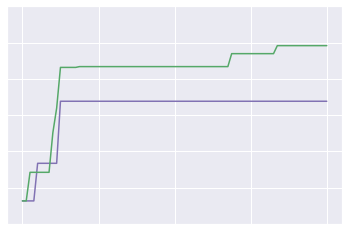

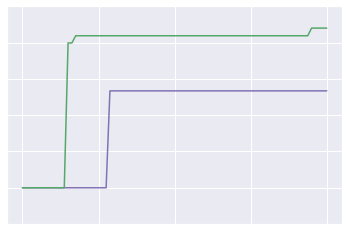

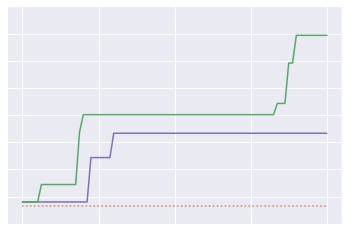

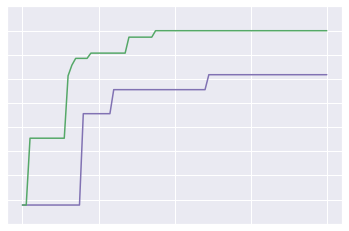

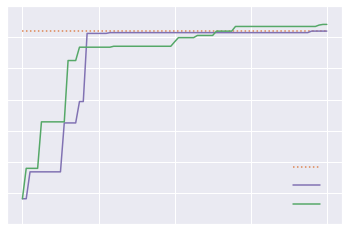

In [77]:
for ii in range(len(folders)):
    clinical = True if ii in [2, 4] else False
    legend = True if ii == 4 else False
    plt.figure()
    plotConvergenceB(folders[ii], clinical=clinical, labels=False, legend=legend)
    plt.savefig(f'fig5{chr(98+2*ii)}.png', dpi=300, bbox_inches='tight')

In [47]:
for ii in range(5):
    print(chr(98+2*ii))

b
d
f
h
j


(-500.0, -300.0)

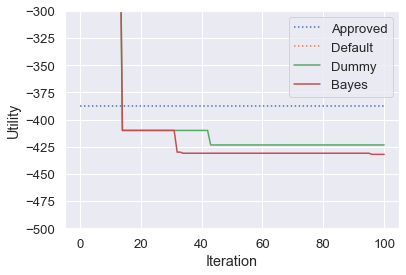

In [50]:
folder = 'SBRT_lung_minsun'
folder = 'ZZ_MK_LLungSBRT3778'
#folder = 'ZZ_MK_RLungSBRT4076'
#folder = 'ZZ_MK_RULungSBRT3796'
#folder = 'ZZ_MK_LLLungSBRT3977'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
plt.plot([0, 100], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
plt.plot([0, 100], [-raybay.get_utility(bayes.goal_df, default.goal_dict)[0], -raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':')
plt.plot(np.arange(1, 101), np.minimum.accumulate(dummy.opt_result.func_vals))
plt.plot(np.arange(1, 101), np.minimum.accumulate(bayes.opt_result.func_vals))
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'], bbox_to_anchor=(1, 1))
plt.ylim([-500, -300])

In [5]:
# Plots for supporting document

def plot2(folder):
    approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
    bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
    val_list = []
    roi_dict = {}
    goal_vals = []
    idx_sol = np.argmin(bayes.opt_result.func_vals)
    for index, row in approved.goal_df.iterrows():
        level = approved.goal_dict[index][0]
        roi_dict[f"{index} {row['Roi']} {row['Type']}"] = index
        val = bayes.goal_dict[index][idx_sol]
        goal_vals.append(100*(val - level)/level)
    val_list.append(goal_vals)
    goal_vals = []
    for index, row in approved.goal_df.iterrows():
        level = approved.goal_df.iloc[index]['AcceptanceLevel']
        val = bayes.goal_dict[index][idx_sol]
        goal_vals.append(100*(val - level)/level)
    val_list.append(goal_vals)
    columns = {'P1', 'P2'}
    val_df = pd.DataFrame(columns=columns, data=val_list, index=roi_dict)
    ncols = len(res_dict)
    fig, ax = plt.subplots(1, figsize=(ncols, len(approved.goal_df)))
    sns.heatmap(val_df, cmap=sns.diverging_palette(220, 20, n=256), center=0,
                annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference From Approved'}, ax=ax)

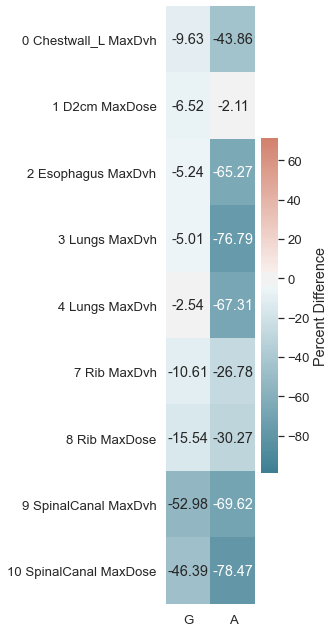

In [7]:
folder = 'SBRT_lung_minsun'
#folder = 'ZZ_MK_LLungSBRT3778'
#folder = 'ZZ_MK_RLungSBRT4076'
#folder = 'ZZ_MK_RULungSBRT3796'
#folder = 'ZZ_MK_LLLungSBRT3977'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
val_list = []
roi_dict = {}

idx_sol = np.argmin(bayes.opt_result.func_vals)
for index, row in approved.goal_df.iterrows():
    goal_vals = []
    if 'PTV' not in row['Roi']:
        level = approved.goal_dict[index][0]
        roi_dict[f"{index} {row['Roi']} {row['Type']}"] = index
        val = bayes.goal_dict[index][idx_sol]
        goal_vals.append(100*(val - level)/level)
        level = approved.goal_df.iloc[index]['AcceptanceLevel']
        val = bayes.goal_dict[index][idx_sol]
        goal_vals.append(100*(val - level)/level)
        val_list.append(goal_vals)
columns = {'A', 'G'}
val_df = pd.DataFrame(columns=columns, data=val_list, index=roi_dict)
ncols = 2
fig, ax = plt.subplots(1, figsize=(ncols, len(approved.goal_df)))
sns.heatmap(val_df, cmap=sns.diverging_palette(220, 20, n=256), center=0, vmin=-98.87, vmax=71.42,
            annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference'}, ax=ax)
plt.savefig('p1.png', dpi=300, bbox_inches='tight')

# low: -78.47, -94.40, -98.87, -98.75, -86.22
# high: -2.11, 34.04, 26.51, 39.77, 71.42

{'0 Chestwall_L MaxDvh': 0,
 '1 D2cm MaxDose': 1,
 '2 Esophagus MaxDvh': 2,
 '3 Lungs MaxDvh': 3,
 '4 Lungs MaxDvh': 4,
 '5 PTV MinDvh': 5,
 '6 PTV MaxDose': 6,
 '7 Rib MaxDvh': 7,
 '8 Rib MaxDose': 8,
 '9 SpinalCanal MaxDvh': 9,
 '10 SpinalCanal MaxDose': 10}

In [2]:
def goalplot(approved, res_dict):
    val_list = []
    roi_dict = {}
    for index, row in approved.goal_df.iterrows():
        goal_vals = []
        level = approved.goal_dict[index][0]
        roi_dict[f"{index} {row['Roi']} {row['Type']}"] = index
        for res in res_dict:
            if res.lower() in ('default'):
                idx_sol = 0
            else:
                idx_sol = np.argmin(res_dict[res].opt_result.func_vals)
            val = res_dict[res].goal_dict[index][idx_sol]
            goal_vals.append(100*(val - level)/level)
        val_list.append(goal_vals)
    columns = res_dict.keys()
    val_df = pd.DataFrame(columns=columns, data=val_list, index=roi_dict)
    ncols = len(res_dict)
    fig, ax = plt.subplots(1, figsize=(ncols, len(approved.goal_df)))
    sns.heatmap(val_df, cmap=sns.diverging_palette(220, 20, n=256), center=0,
                annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference From Approved'}, ax=ax)

In [48]:
def patientplot(folder, normalize=False):
    approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
    default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
    dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
    bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
    analyze.goalplot(approved.goal_df, {'Approved': approved, 'Default': default, 'Dummy': dummy, 'Bayes': bayes})
    goalplot(approved, {'Default': default, 'Dummy': dummy, 'Bayes': bayes})
    if normalize:
        idx = np.argmin(bayes.opt_result.func_vals)
        coeff = bayes.goal_dict[6][idx]/bayes.dvh_dict['Dose'][-1]
    else:
        coeff = 1.0
    for roi in approved.roi_list:
        plt.figure()
        plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
        plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
        plt.plot(dummy.dvh_dict['Dose'], dummy.dvh_dict[roi])
        plt.plot(coeff*bayes.dvh_dict['Dose'], bayes.dvh_dict[roi])
        plt.xlabel('Dose (cGy)')
        plt.ylabel('Volume (%)')
        plt.title(roi)
        plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'])

# Patient 1

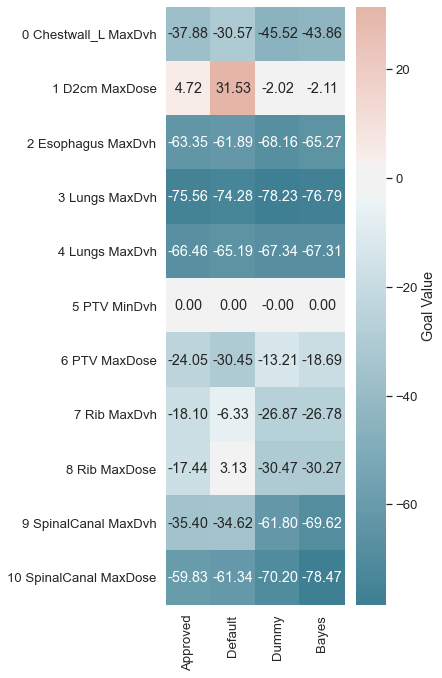

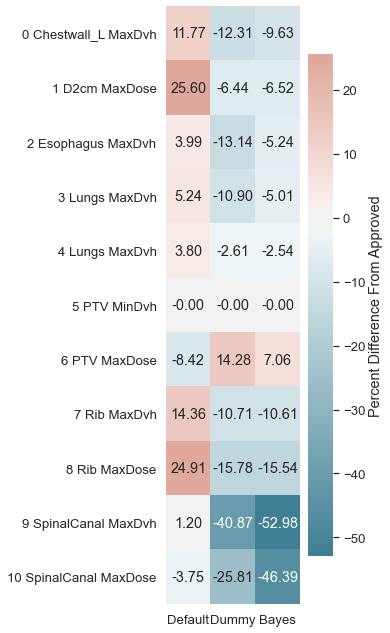

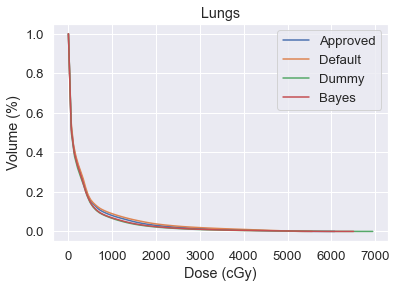

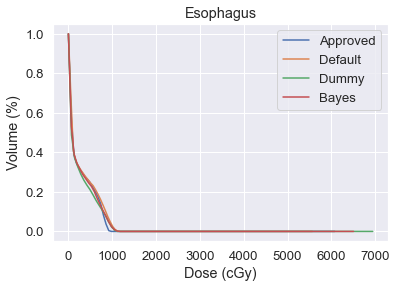

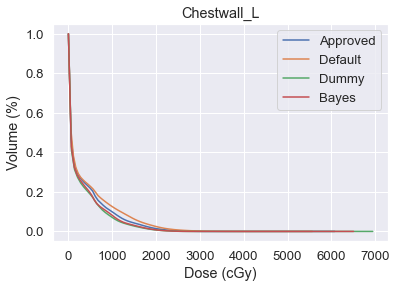

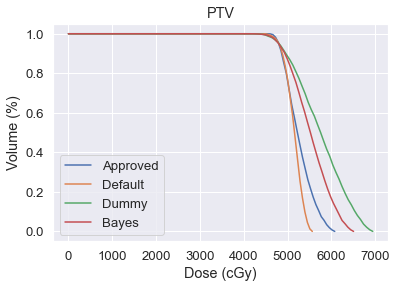

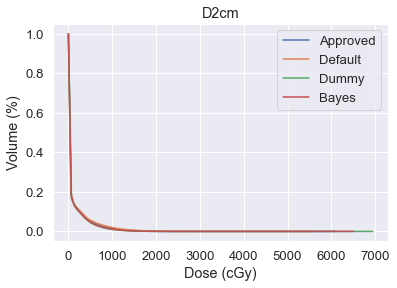

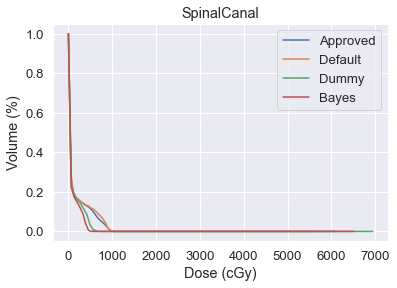

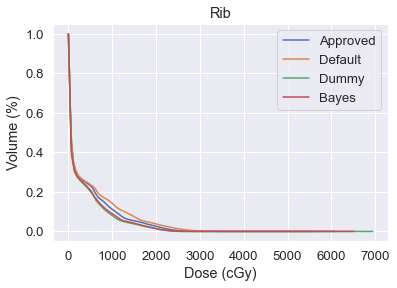

In [12]:
patientplot('SBRT_lung_minsun')

(-500.0, -300.0)

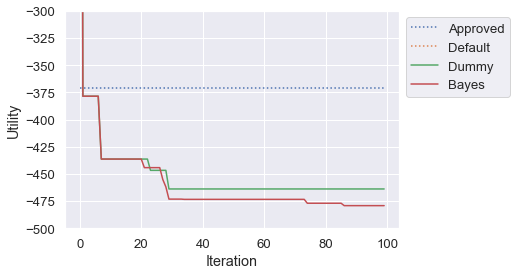

In [42]:
folder = 'SBRT_lung_minsun'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, default.goal_dict)[0], -raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':')
plt.plot(np.minimum.accumulate(dummy.opt_result.func_vals))
plt.plot(np.minimum.accumulate(bayes.opt_result.func_vals))
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'], bbox_to_anchor=(1, 1))
plt.ylim([-500, -300])

# Patient 2

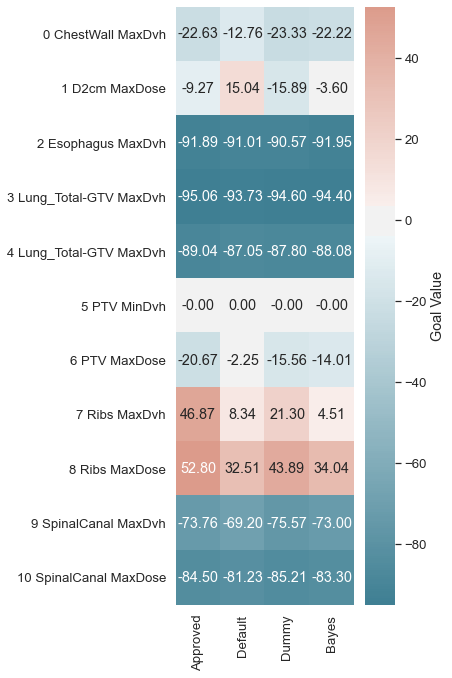

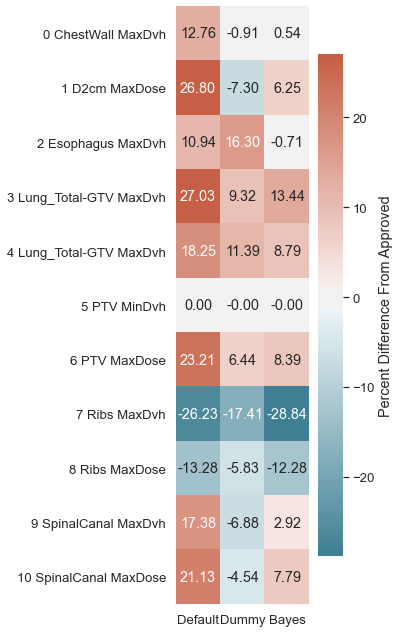

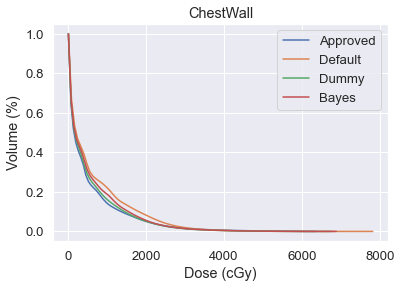

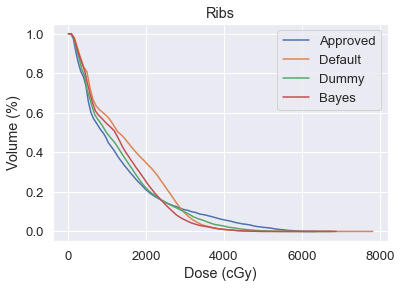

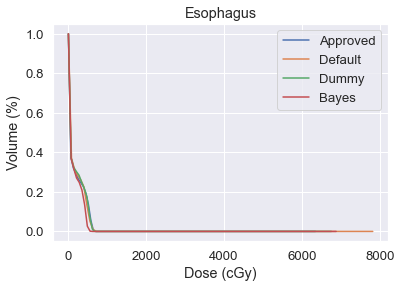

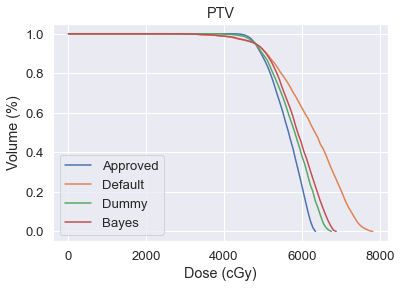

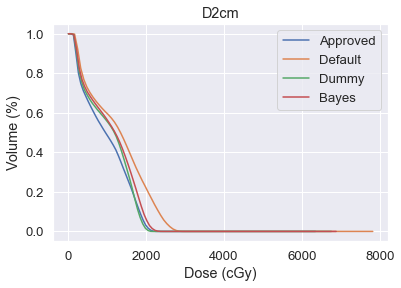

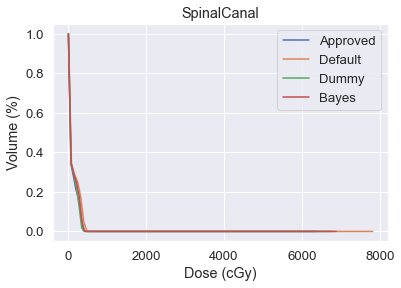

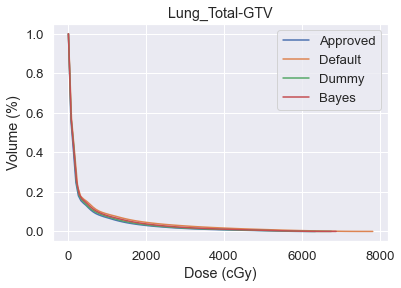

In [13]:
patientplot('ZZ_MK_LLungSBRT3778')

(-500.0, 0.0)

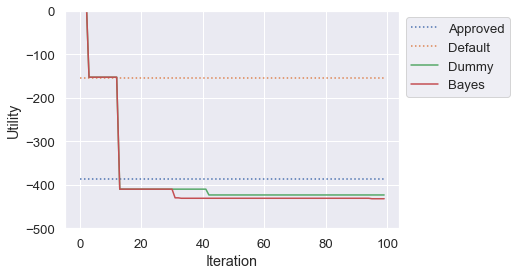

In [36]:
folder = 'ZZ_MK_LLungSBRT3778'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, default.goal_dict)[0], -raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':')
plt.plot(np.minimum.accumulate(dummy.opt_result.func_vals))
plt.plot(np.minimum.accumulate(bayes.opt_result.func_vals))
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'], bbox_to_anchor=(1, 1))
plt.ylim([-500, 0])

# Patient 3

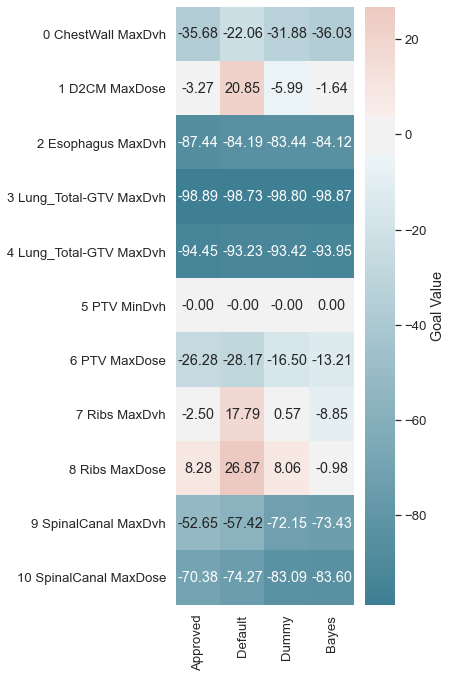

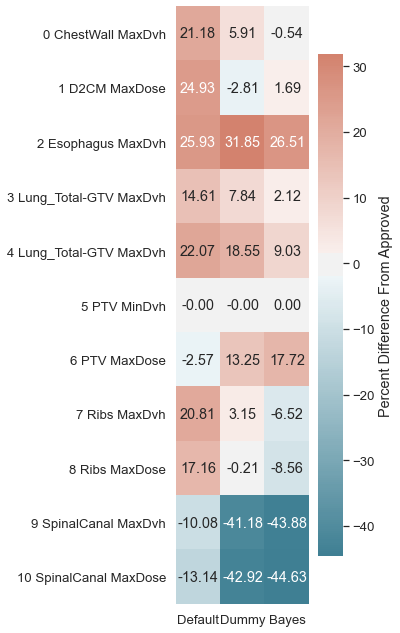

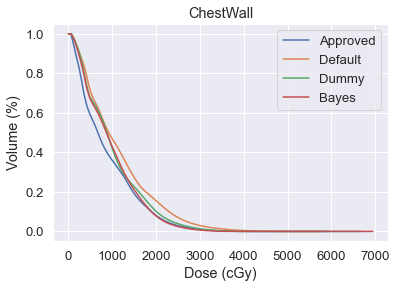

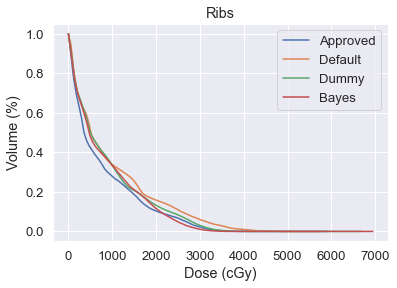

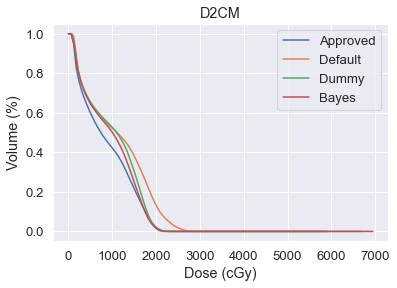

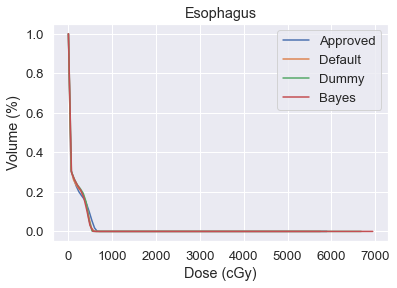

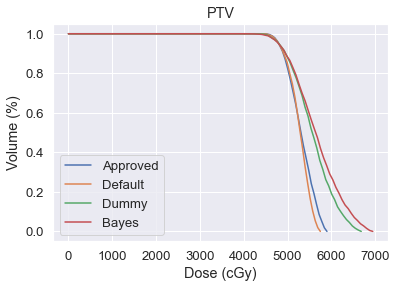

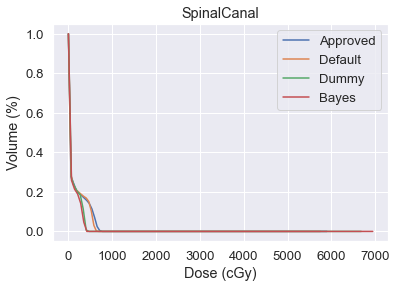

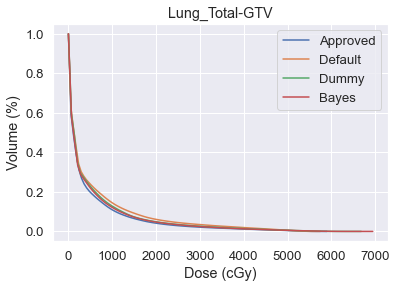

In [56]:
patientplot('ZZ_MK_RLungSBRT4076')

(-500.0, -400.0)

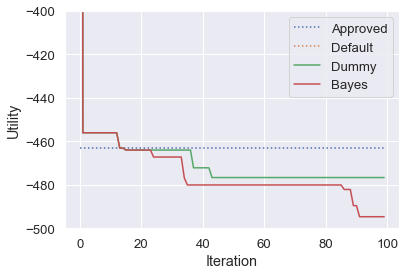

In [45]:
folder = 'ZZ_MK_RLungSBRT4076'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, default.goal_dict)[0], -raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':')
plt.plot(np.minimum.accumulate(dummy.opt_result.func_vals))
plt.plot(np.minimum.accumulate(bayes.opt_result.func_vals))
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'], bbox_to_anchor=(1, 1))
plt.ylim([-500, -400])

# Patient 4

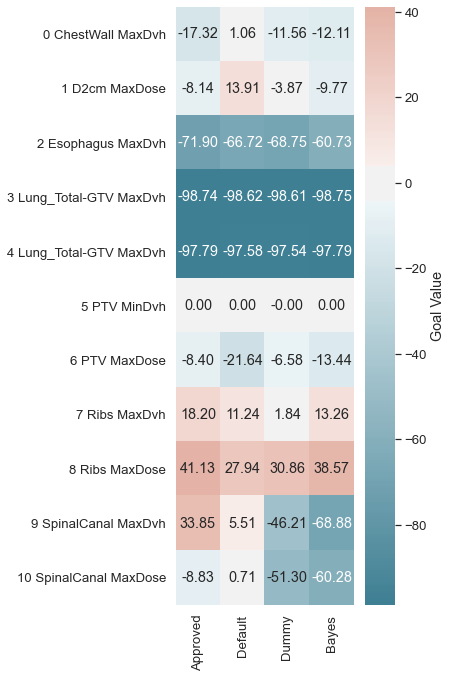

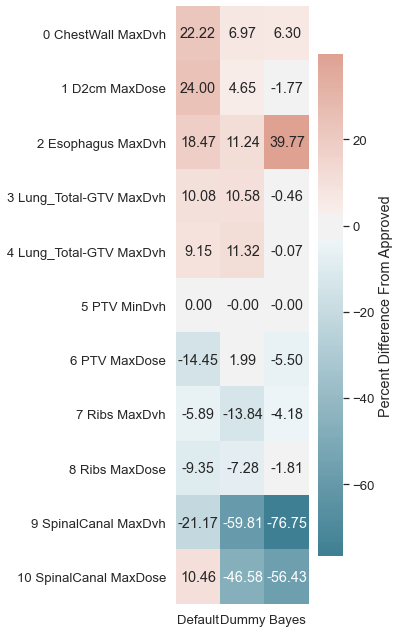

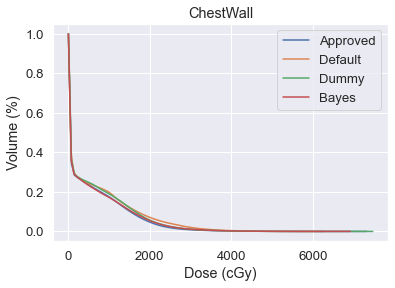

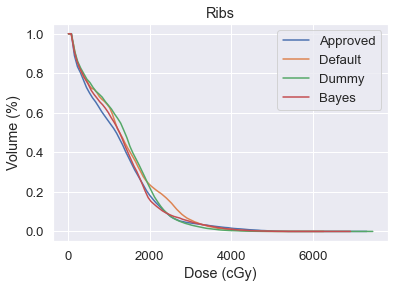

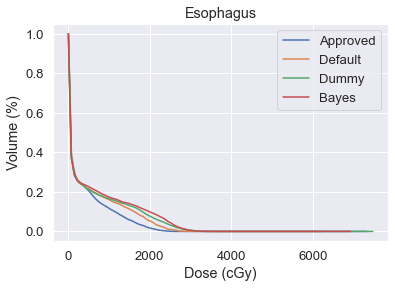

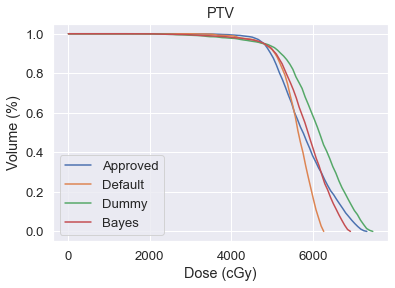

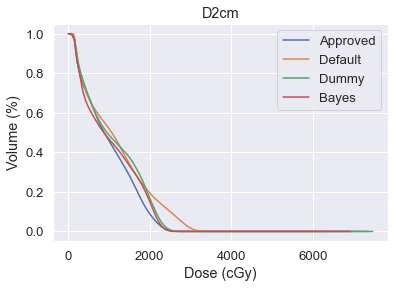

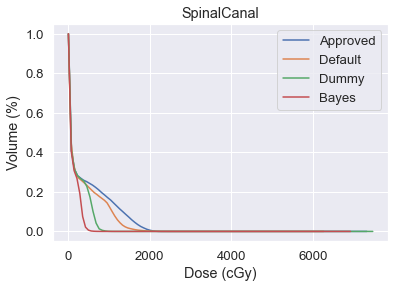

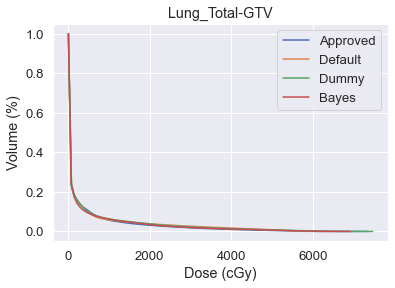

In [49]:
patientplot('ZZ_MK_RULungSBRT3796', True)

(-400.0, 0.0)

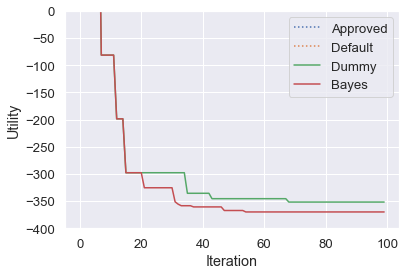

In [55]:
folder = 'ZZ_MK_RULungSBRT3796'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, default.goal_dict)[0], -raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':')
plt.plot(np.minimum.accumulate(dummy.opt_result.func_vals))
plt.plot(np.minimum.accumulate(bayes.opt_result.func_vals))
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'], bbox_to_anchor=(1, 1))
plt.ylim([-400, 0])

# Patient 5

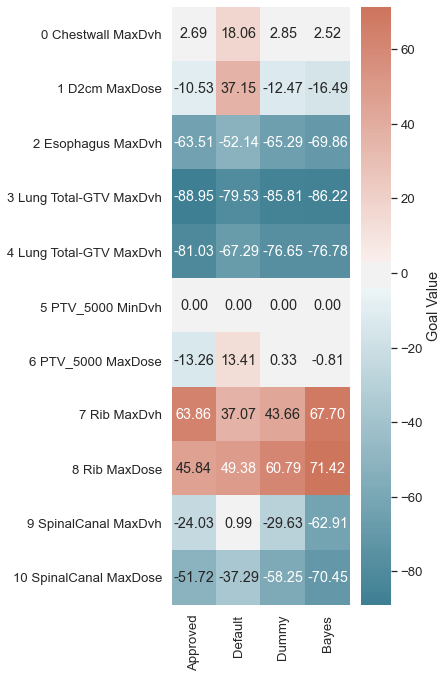

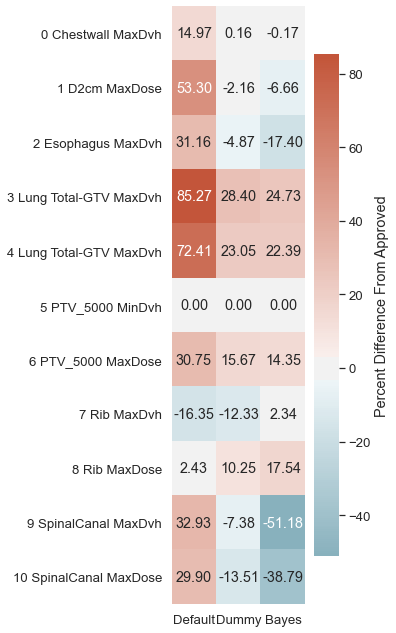

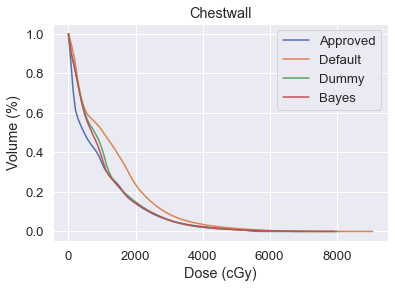

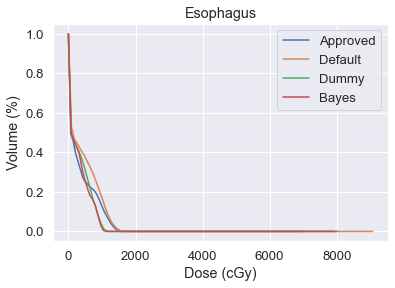

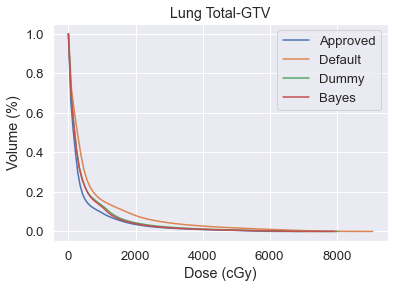

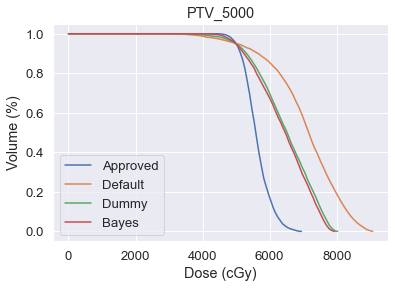

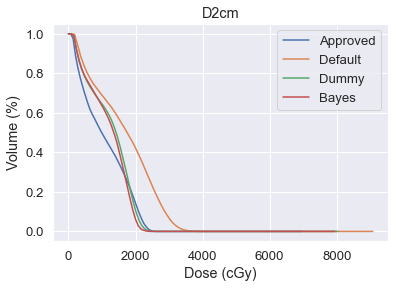

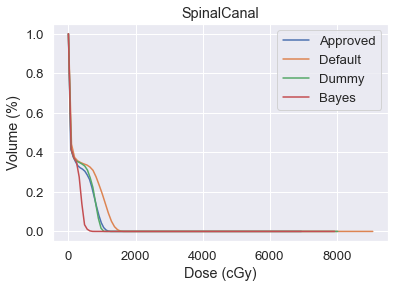

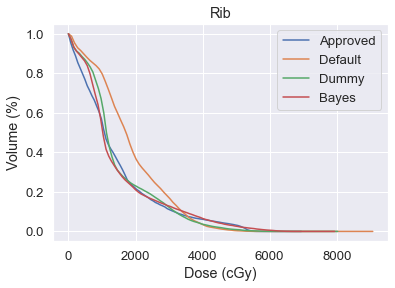

In [57]:
patientplot('ZZ_MK_LLLungSBRT3977')

(-300.0, 0.0)

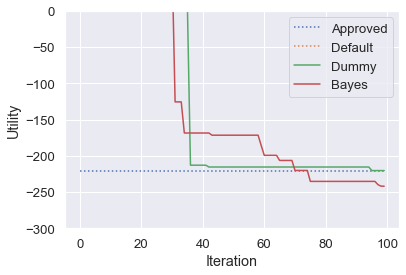

In [66]:
folder = 'ZZ_MK_LLLungSBRT3977'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, default.goal_dict)[0], -raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':')
plt.plot(np.minimum.accumulate(dummy.opt_result.func_vals))
plt.plot(np.minimum.accumulate(bayes.opt_result.func_vals))
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'], bbox_to_anchor=(1, 1))
plt.ylim([-300, 0])

In [3]:
# What I want to create: percent difference from gamma (all patients: approved, dummy, bayes),
# then percent difference from approved (all patients: dummy, bayes)
# I would also like to show the convergence results and the DVHs, but not sure how best to format the DVHs,
# maybe include in an appendix? maybe not

In [8]:
folder = 'SBRT_lung_minsun'
approved_1 = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
dummy_1 = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes_1 = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)

folder = 'ZZ_MK_LLungSBRT3778'
approved_2 = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
dummy_2 = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes_2 = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)

folder = 'ZZ_MK_RLungSBRT4076'
approved_3 = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
dummy_3 = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes_3 = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)

folder = 'ZZ_MK_RULungSBRT3796'
approved_4 = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
dummy_4 = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes_4 = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)

folder = 'ZZ_MK_LLLungSBRT3977'
approved_5 = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
dummy_5 = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes_5 = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)

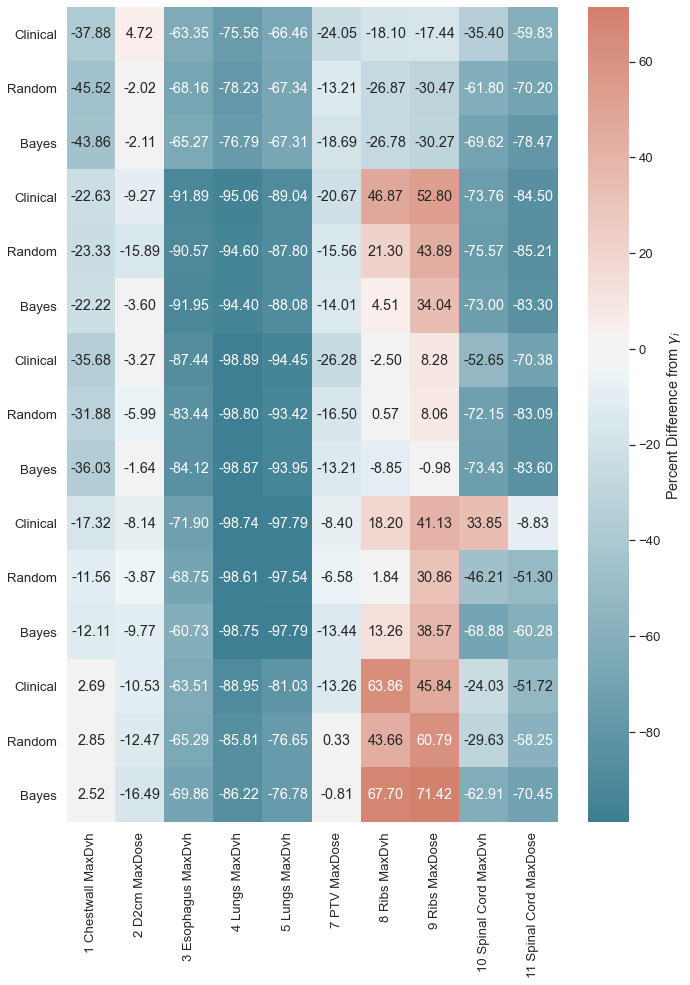

In [359]:
val_list = []
roi_dict = {}

res_list = [
    [approved_1, dummy_1, bayes_1],
    [approved_2, dummy_2, bayes_2],
    [approved_3, dummy_3, bayes_3],
    [approved_4, dummy_4, bayes_4],
    [approved_5, dummy_5, bayes_5],
]

roi_names = ['Chestwall', 'D2cm', 'Esophagus', 'Lungs', 'Lungs', 'PTV', 'Ribs', 'Ribs', 'Spinal Cord', 'Spinal Cord']

k = 0
for index, row in bayes_1.goal_df.iterrows():
    goal_vals = []
    
    if index != 5:
        roi_dict[f"{index + 1} {roi_names[k]} {row['Type']}"] = index + 1
        
        for res in res_list:
            idx_dummy = np.argmin(res[1].opt_result.func_vals)
            idx_bayes = np.argmin(res[2].opt_result.func_vals)
            level = res[2].goal_df.iloc[index]['AcceptanceLevel']
            val = res[0].goal_dict[index][0]
            goal_vals.append(100*(val - level)/level)
            val = res[1].goal_dict[index][idx_dummy]
            goal_vals.append(100*(val - level)/level)
            val = res[2].goal_dict[index][idx_bayes]
            goal_vals.append(100*(val - level)/level)

        val_list.append(goal_vals)
        k += 1
        
columns = [f'{name}' for ii in range(1,6) for name in ['Clinical', 'Random', 'Bayes']]
val_df = pd.DataFrame(columns=columns, data=val_list, index=roi_dict)
ncols = len(columns)
fig, ax = plt.subplots(1, figsize=(len(bayes.goal_df), ncols))
sns.heatmap(val_df.transpose(), cmap=sns.diverging_palette(220, 20, n=256), center=0,
            annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference from $\gamma_i$'}, ax=ax)
plt.yticks(rotation='horizontal')
plt.savefig('diffGoal_labels.png', bbox_inches='tight', dpi=300)

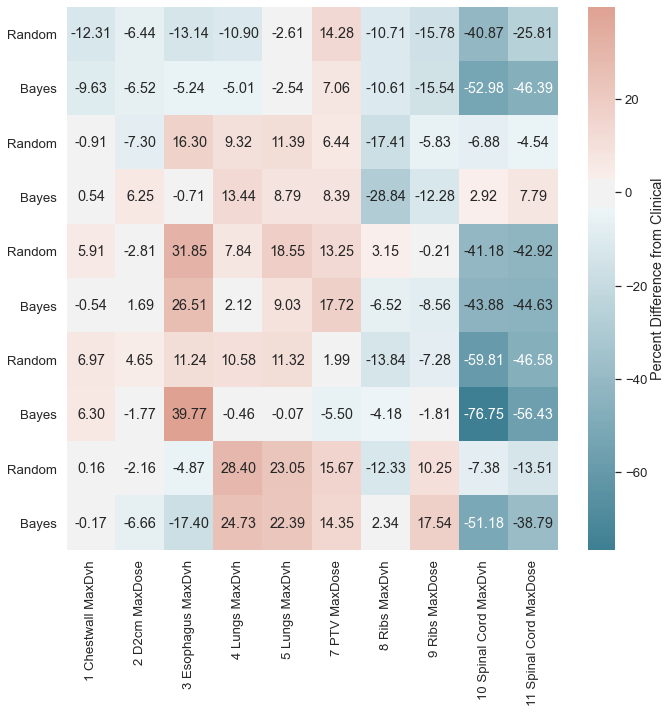

In [379]:
val_list = []
roi_dict = {}

res_list = [
    [approved_1, dummy_1, bayes_1],
    [approved_2, dummy_2, bayes_2],
    [approved_3, dummy_3, bayes_3],
    [approved_4, dummy_4, bayes_4],
    [approved_5, dummy_5, bayes_5],
]

k = 0
for index, row in bayes_1.goal_df.iterrows():
    goal_vals = []
    
    if index != 5:
        roi_dict[f"{index + 1} {roi_names[k]} {row['Type']}"] = index + 1
        
        for res in res_list:
            idx_dummy = np.argmin(res[1].opt_result.func_vals)
            idx_bayes = np.argmin(res[2].opt_result.func_vals)
            level = res[0].goal_dict[index][0]
            val = res[1].goal_dict[index][idx_dummy]
            goal_vals.append(100*(val - level)/level)
            val = res[2].goal_dict[index][idx_bayes]
            goal_vals.append(100*(val - level)/level)

        val_list.append(goal_vals)
        k += 1
        
columns = [f'{name}' for ii in range(1,6) for name in ['Random', 'Bayes']]
val_df = pd.DataFrame(columns=columns, data=val_list, index=roi_dict)
ncols = len(columns)
fig, ax = plt.subplots(1, figsize=(len(bayes.goal_df), ncols))
sns.heatmap(val_df.transpose(), cmap=sns.diverging_palette(220, 20, n=256), center=0,
            annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference from Clinical'}, ax=ax)
plt.yticks(rotation='horizontal')
plt.savefig('diffApproved.png', bbox_inches='tight', dpi=300)

In [3]:
colors = sns.color_palette()

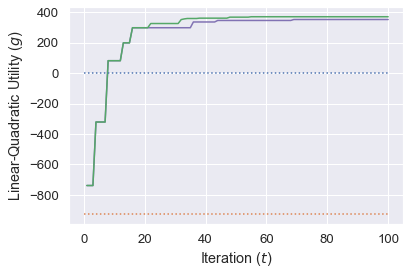

In [7]:
folder = 'SBRT_lung_minsun'
folder = 'ZZ_MK_LLungSBRT3778'
folder = 'ZZ_MK_RLungSBRT4076'
folder = 'ZZ_MK_RULungSBRT3796'
#folder = 'ZZ_MK_LLLungSBRT3977'

approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
p1, = plt.plot([0, 100],
               [raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]],
               ':', color=colors[1])
p3, = plt.plot(np.arange(1, 101), -np.minimum.accumulate(dummy.opt_result.func_vals), color=colors[4])
p4, = plt.plot(np.arange(1, 101), -np.minimum.accumulate(bayes.opt_result.func_vals), color=colors[2])
p2, = plt.plot([0, 100],
               [raybay.get_utility(bayes.goal_df, default.goal_dict)[0], raybay.get_utility(bayes.goal_df, default.goal_dict)[0]],
               ':', color=colors[0])
plt.xlabel('Iteration ($t$)')
plt.ylabel('Linear-Quadratic Utility ($g$)')
#plt.legend([p1, p2, p3, p4], ['Clinical', 'Default', 'Random', 'Bayes'])
plt.savefig('conv4a_labels.png', bbox_inches='tight', dpi=300)

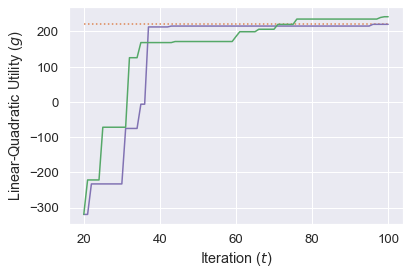

In [376]:
folder = 'SBRT_lung_minsun'
folder = 'ZZ_MK_LLungSBRT3778'
folder = 'ZZ_MK_RLungSBRT4076'
folder = 'ZZ_MK_RULungSBRT3796'
folder = 'ZZ_MK_LLLungSBRT3977'

#plt.plot(-50, -0)
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
plt.plot([20, 100],
        [raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]],
        ':', color=colors[1])
plt.plot(np.arange(20, 101), -np.minimum.accumulate(dummy.opt_result.func_vals)[19:], color=colors[4])
plt.plot(np.arange(20, 101), -np.minimum.accumulate(bayes.opt_result.func_vals)[19:], color=colors[2])
plt.xlabel('Iteration ($t$)')
plt.ylabel('Linear-Quadratic Utility ($g$)')
plt.savefig('conv5b_labels.png', bbox_inches='tight', dpi=300)

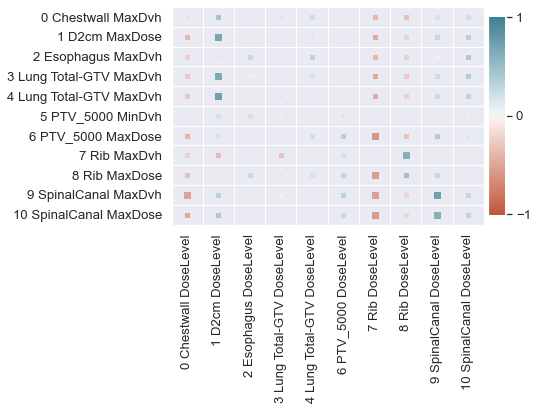

In [168]:
bayes.corrplot('pars')

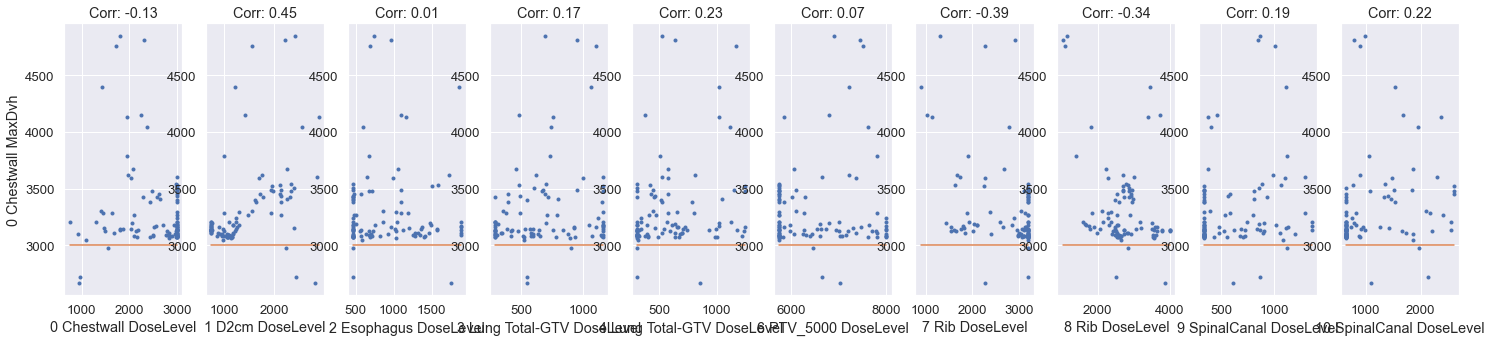

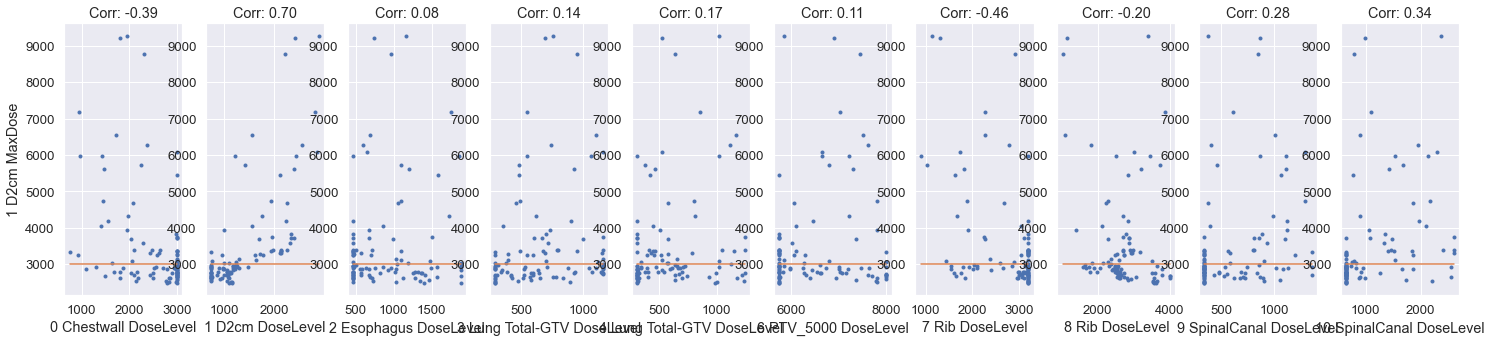

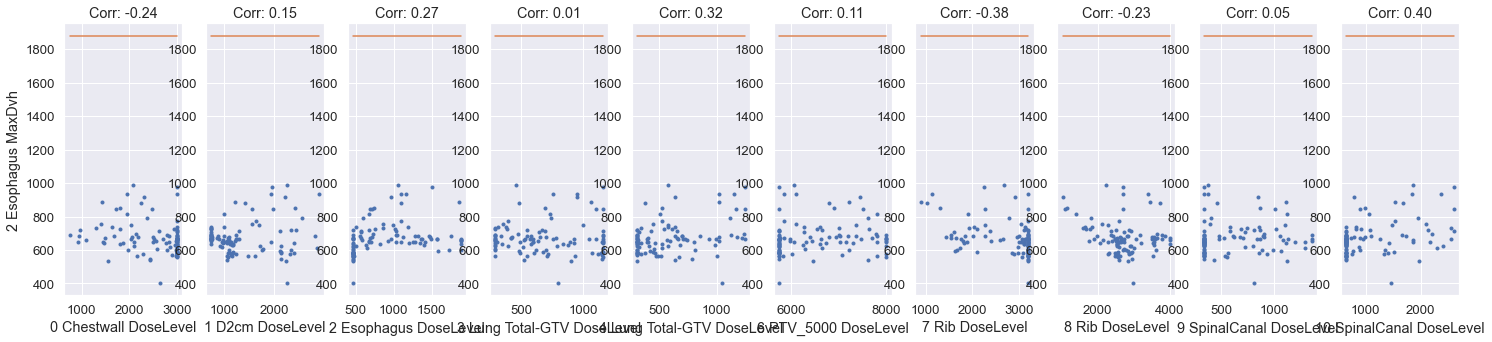

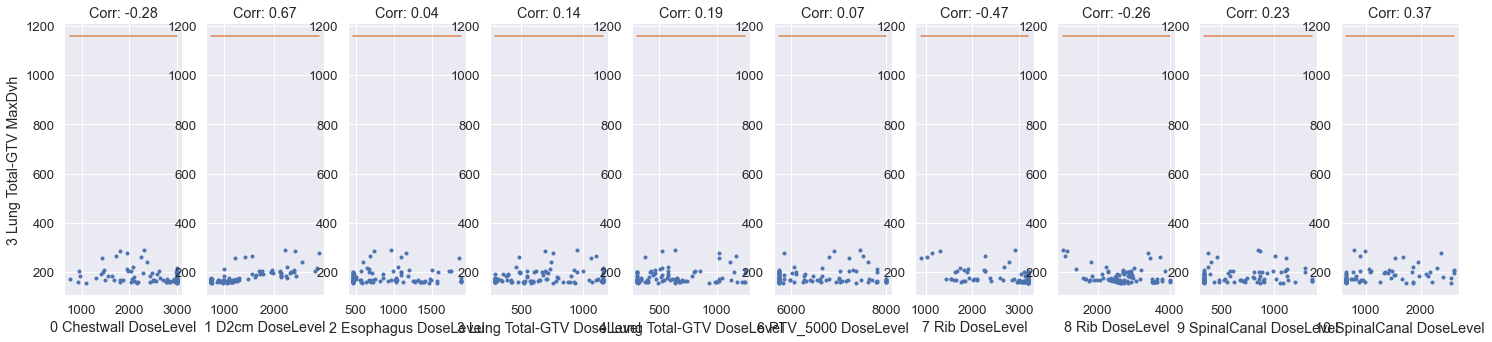

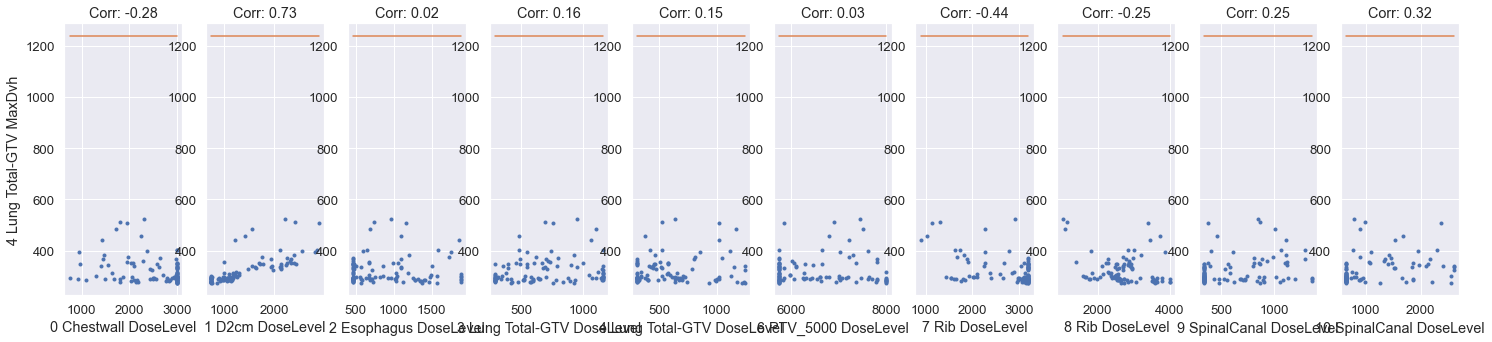

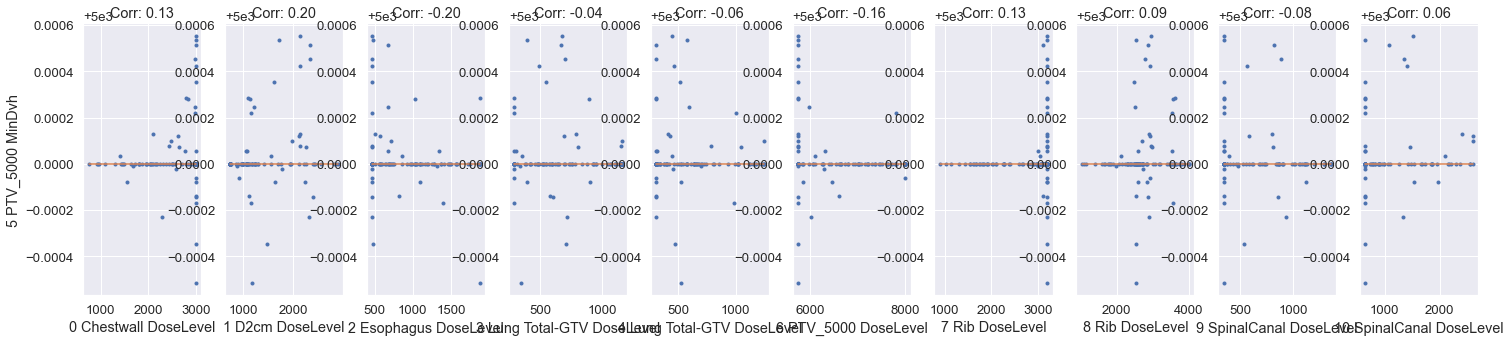

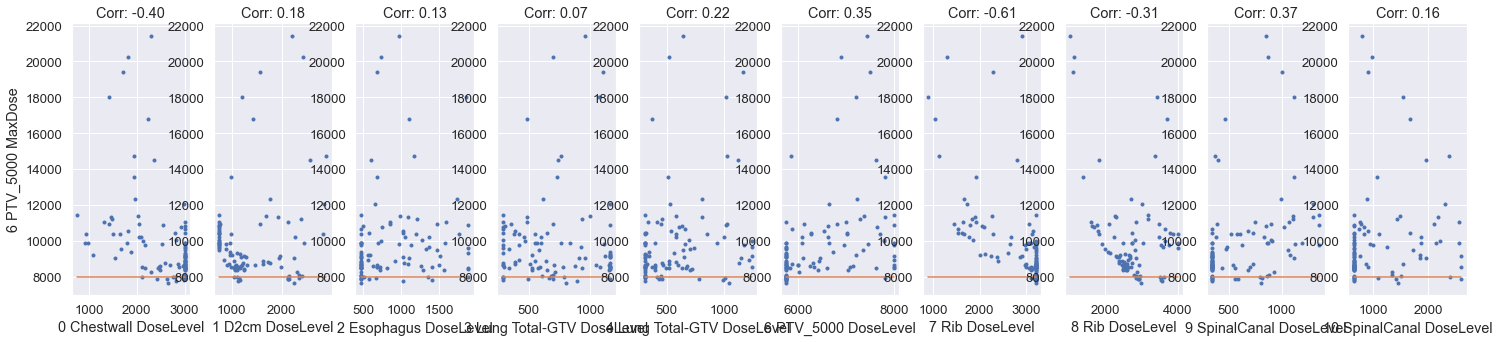

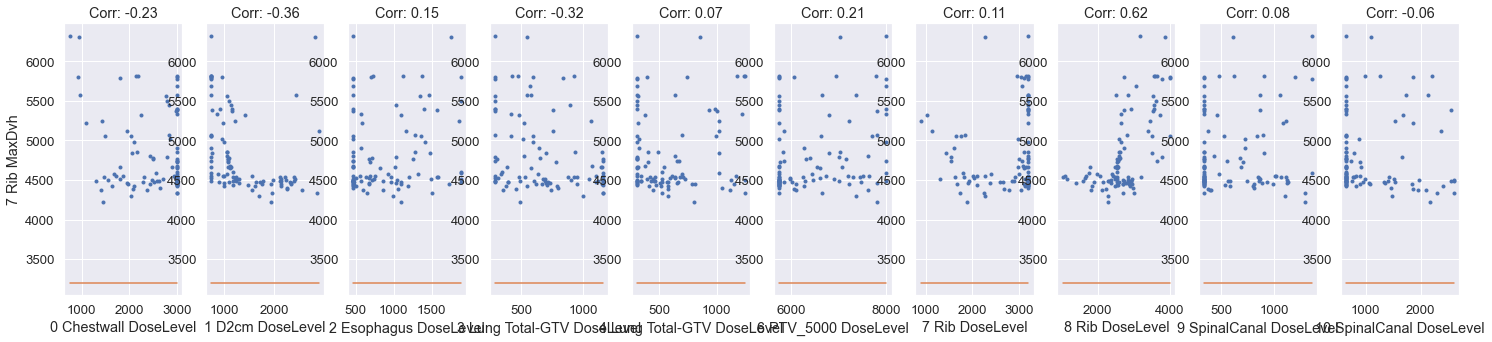

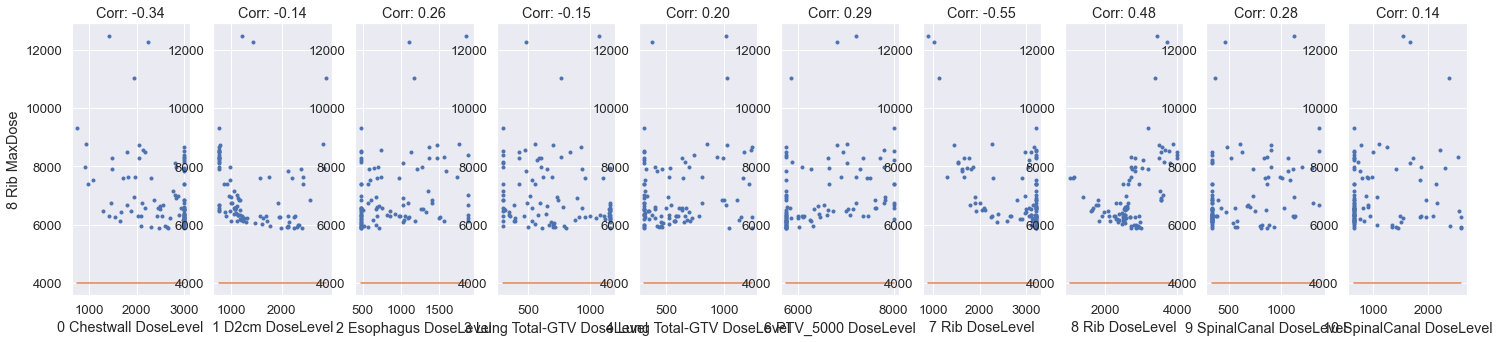

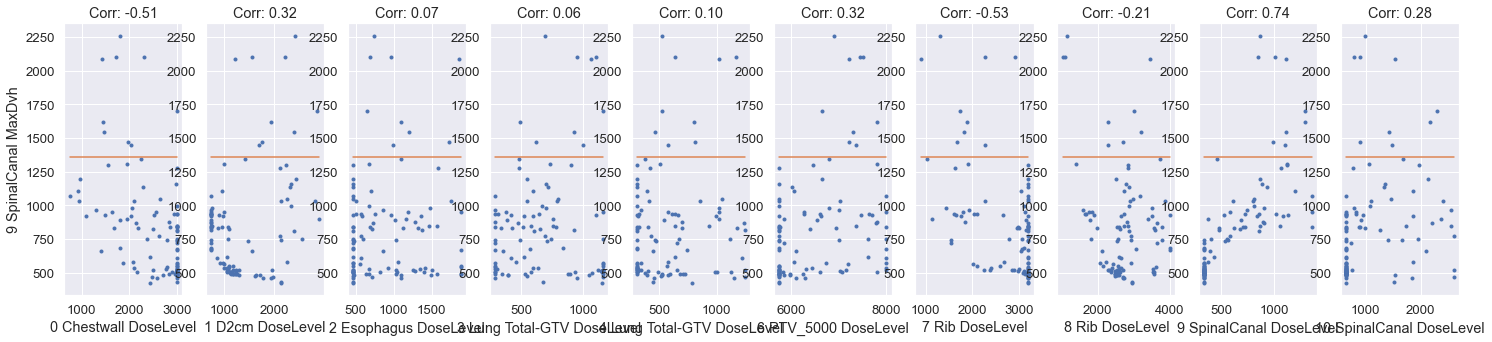

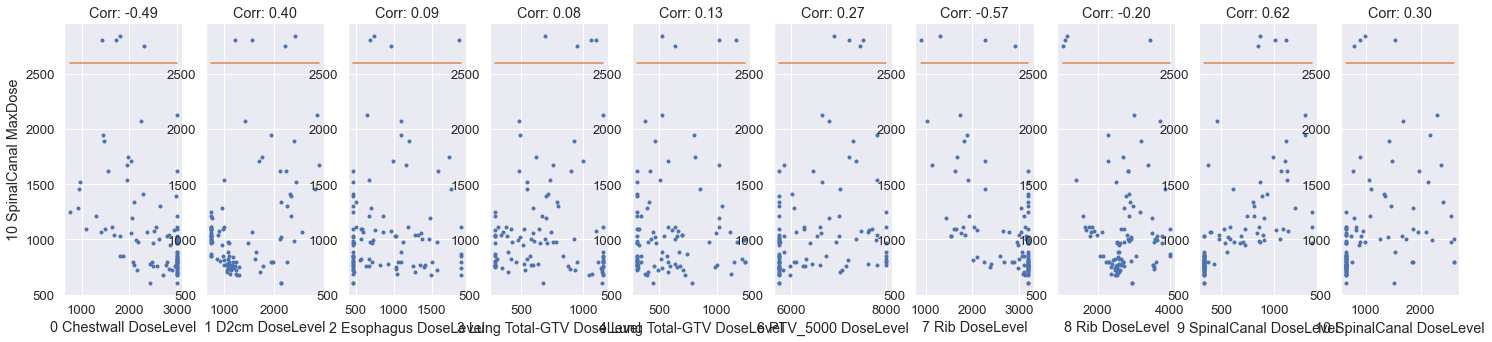

In [170]:
bayes.scatterplot('pars')
# D2cm max [gamma/4, 3*gamma/4] [750, 2250]
# ribs max [gamma/2, gamma] [2000, 4000]
# PTV keep
# spinal canal max dvh [gamma/4, 3*gamma/4] [340, 1020]

In [296]:
pars = np.array(bayes.opt_result.x_iters)

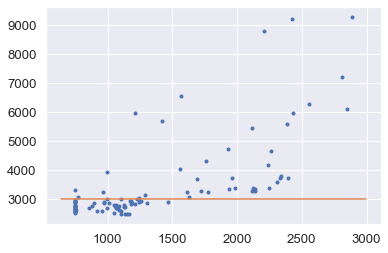

In [300]:
plt.plot(pars[:,1], bayes.goal_dict[1], '.')
xlim = plt.xlim()
plt.plot(xlim, [3000, 3000])

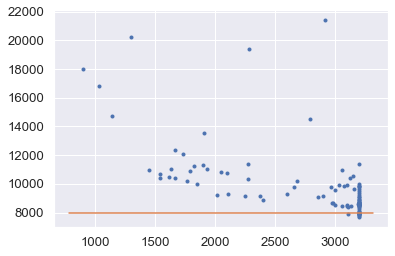

In [303]:
plt.plot(pars[:,6], bayes.goal_dict[6], '.')
xlim = plt.xlim()
plt.plot(xlim, [8000, 8000])

In [389]:
def dvhplot(folder, name, normalize=False, legend=False):
    plt.figure()
    approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
    dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
    bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
    if normalize:
        idx = np.argmin(bayes.opt_result.func_vals)
        coeff = bayes.goal_dict[6][idx]/bayes.dvh_dict['Dose'][-1]
    else:
        coeff = 1.0
    colors = sns.color_palette()
    names = list(approved.roi_list)
    names.sort()
    labels = ['Chestwall', 'D2cm', 'Esophagus', 'Lungs', 'PTV', 'Ribs', 'Spinal Cord']
    handles = []
    for ii, roi in enumerate(names):
        color = colors[ii]
        plt.plot(approved.dvh_dict['Dose']/100, approved.dvh_dict[roi],':',color=color)
        plt.plot(dummy.dvh_dict['Dose']/100, dummy.dvh_dict[roi],'--', color=color)
        p, = plt.plot(coeff*bayes.dvh_dict['Dose']/100, bayes.dvh_dict[roi],color=color)
        handles.append(p)
        plt.xlabel('Dose (Gy)')
        plt.ylabel('Volume (%)')
        if legend:
            plt.legend(handles, labels, bbox_to_anchor=(1, 1))
    plt.savefig(name, bbox_inches='tight', dpi=300)

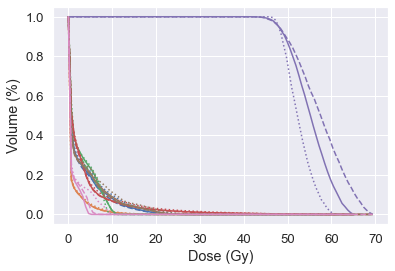

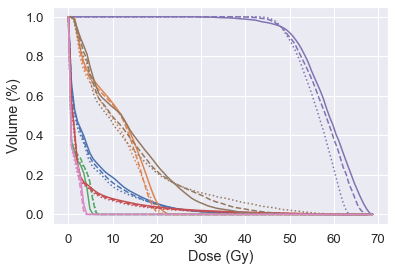

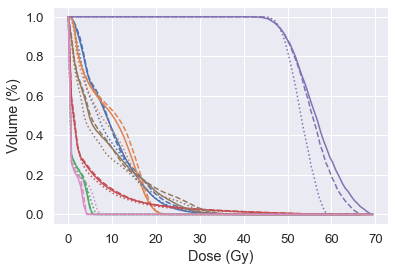

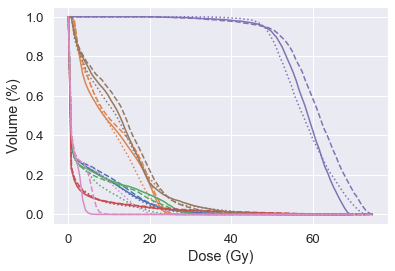

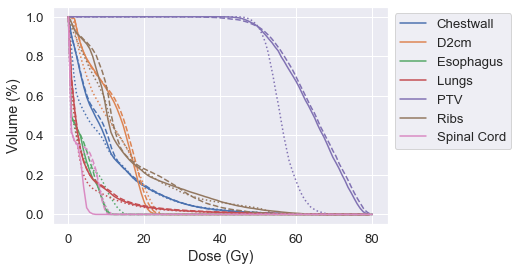

In [390]:
dvhplot('SBRT_lung_minsun', 'dvh1_labels.png')
dvhplot('ZZ_MK_LLungSBRT3778', 'dvh2_labels.png')
dvhplot('ZZ_MK_RLungSBRT4076', 'dvh3_labels.png')
dvhplot('ZZ_MK_RULungSBRT3796', 'dvh4_labels.png', True)
dvhplot('ZZ_MK_LLLungSBRT3977', 'dvh5_labels.png', legend=True)

In [264]:
folder = 'SBRT_lung_minsun'
#folder = 'ZZ_MK_LLungSBRT3778'
#folder = 'ZZ_MK_RLungSBRT4076'
#folder = 'ZZ_MK_RULungSBRT3796'
#folder = 'ZZ_MK_LLLungSBRT3977'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)

d = []
b = []
fd = []
fb = []
fc = []
for folder in ['SBRT_lung_minsun', 'ZZ_MK_LLungSBRT3778', 'ZZ_MK_RLungSBRT4076', 'ZZ_MK_RULungSBRT3796', 'ZZ_MK_LLLungSBRT3977']:
    approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
    dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
    bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
    d.append(dummy.time/3600)
    b.append(bayes.time/3600)
    fd.append(-dummy.opt_result.fun)
    fb.append(-bayes.opt_result.fun)
    fc.append(raybay.get_utility(bayes.goal_df, approved.goal_dict)[0])
t = d + b

In [276]:
np.median([b[ii] - d[ii] for ii in range(len(b))])

29.90283182064692

In [293]:
np.mean(d)

1.9910808571312164

In [249]:
np.mean(b)

2.534305286129316

In [250]:
np.mean(t)

2.2626930716302662

In [251]:
np.min(d)

1.3076866429381901

In [252]:
np.min(b)

1.8060671732823055

In [253]:
np.max(d)

2.880300281378958

In [254]:
np.max(b)

3.6440617928240036

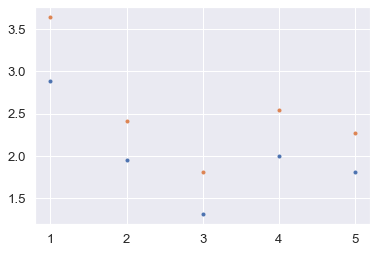

In [256]:
plt.plot(np.arange(1, 6), d, '.')
plt.plot(np.arange(1, 6), b, '.')

(200.0, 500.0)

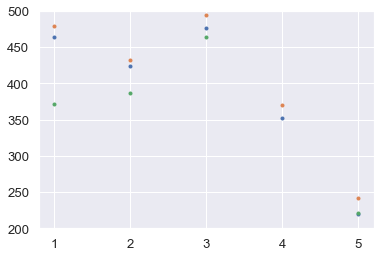

In [266]:
plt.plot(np.arange(1, 6), fd, '.')
plt.plot(np.arange(1, 6), fb, '.')
plt.plot(np.arange(1, 6), fc, '.')
plt.ylim([200, 500])

In [275]:
np.median([fb[ii] - fd[ii] for ii in range(len(fb))])

18.012863372591028

In [272]:
np.median([fb[ii] - fc[ii] for ii in [0, 1, 2, 3, 4]])

44.83522397278364

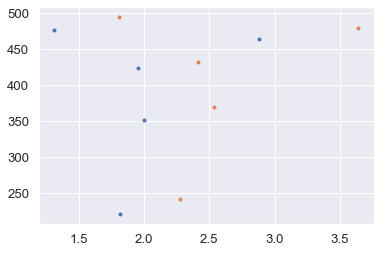

In [277]:
plt.plot(d, fd, '.')
plt.plot(b, fb, '.')

In [282]:
np.mean([(fb[ii] - fd[ii])/fd[ii] for ii in range(len(fb))])*100

4.815489934271882

In [290]:
np.mean([(fb[ii] - fc[ii])/abs(fc[ii]) for ii in range(len(fb))])*100

39.39825292295208

In [292]:
np.median([(fb[ii] - fc[ii])/abs(fc[ii]) for ii in range(len(fb))])*100

11.580443823014845

In [2]:
folder = 'ZZ_MK_LLLungSBRT3977'
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)

In [17]:
x_dummy = np.array(dummy.opt_result.x_iters)
x_bayes = np.array(bayes.opt_result.x_iters)
roi_list = ['Chestwall', 'D2cm', 'Esophagus', 'Lungs', 'Lungs', 'PTV', 'Ribs', 'Ribs', 'Spinal Cord', 'Spinal Cord']

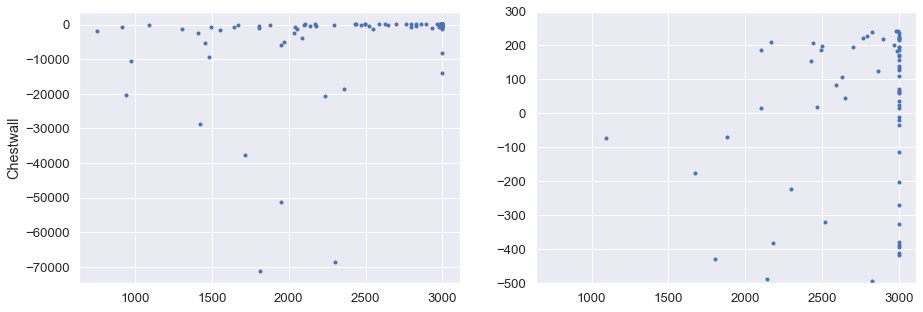

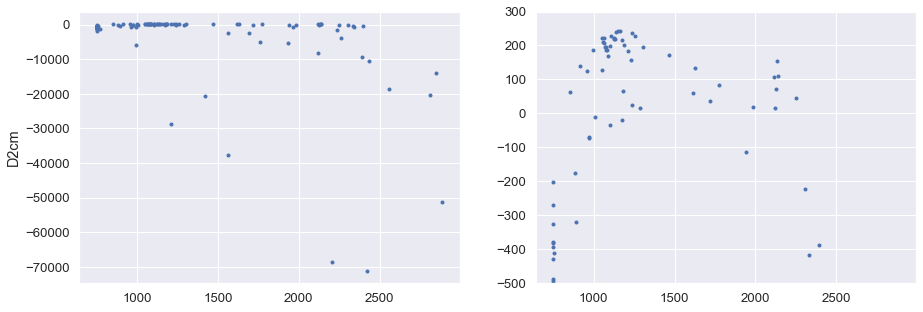

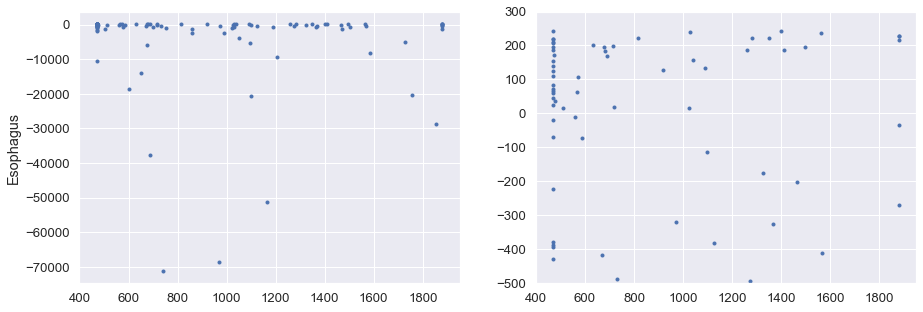

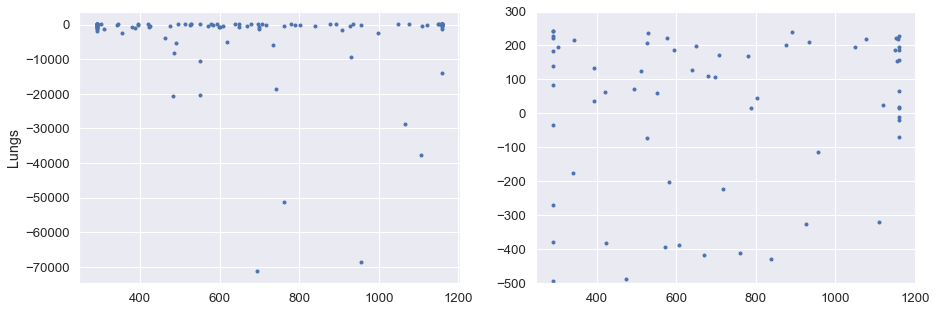

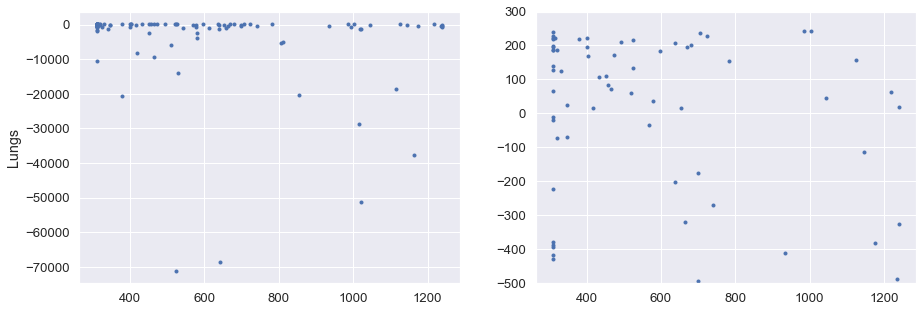

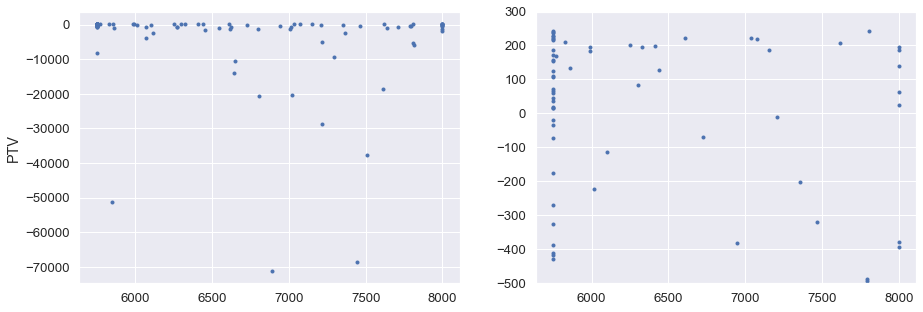

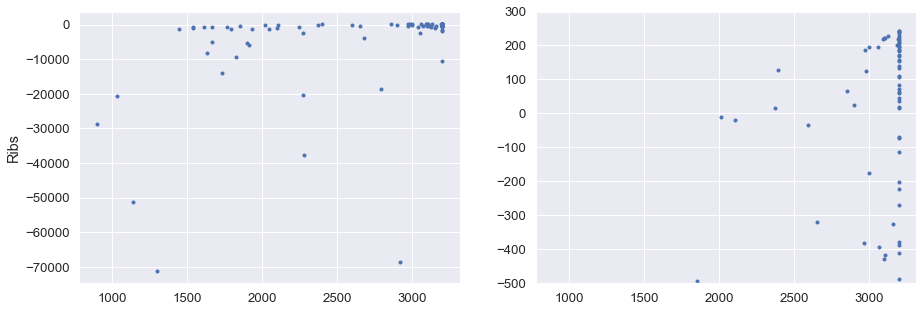

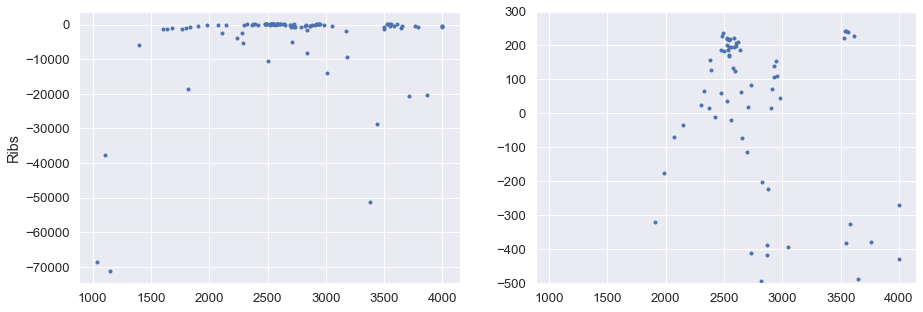

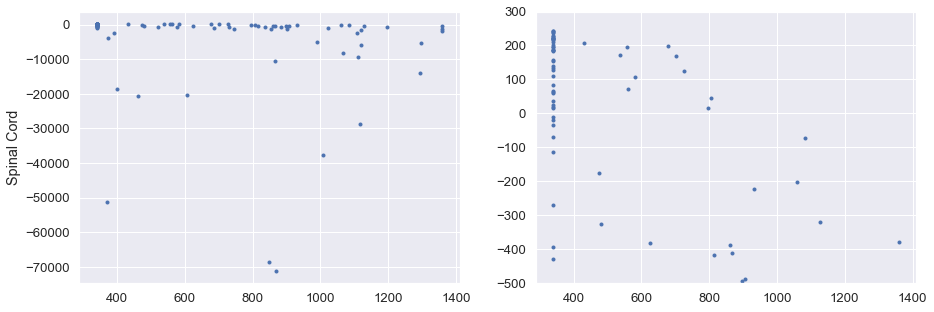

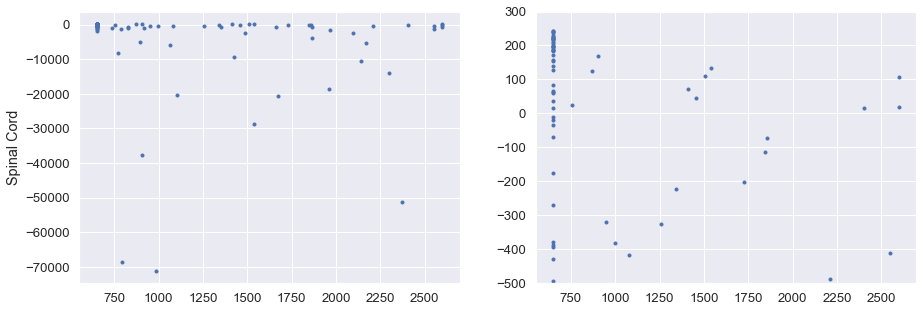

In [34]:
for ii in range(10):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    #ax[0].plot(x_dummy[:,ii], -dummy.opt_result.func_vals, '.')
    ax[0].plot(x_bayes[:,ii], -bayes.opt_result.func_vals, '.')
    ax[0].set_ylabel(roi_list[ii])
    #ax[1].plot(x_dummy[:,ii], -dummy.opt_result.func_vals, '.')
    ax[1].plot(x_bayes[:,ii], -bayes.opt_result.func_vals, '.')
    ax[1].set_ylim([-500, 300])

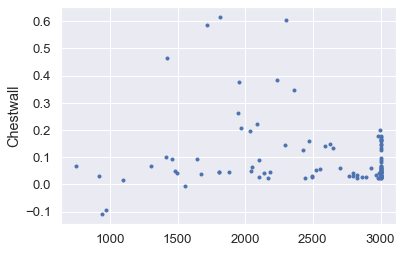

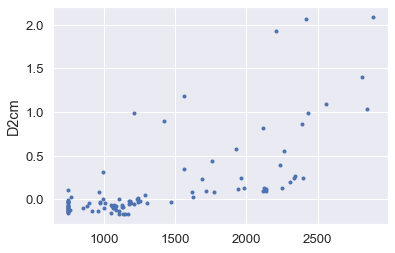

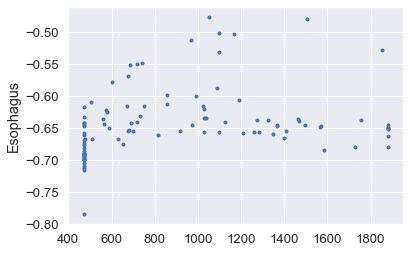

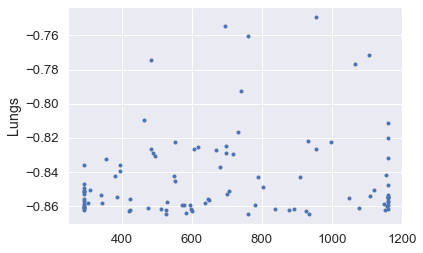

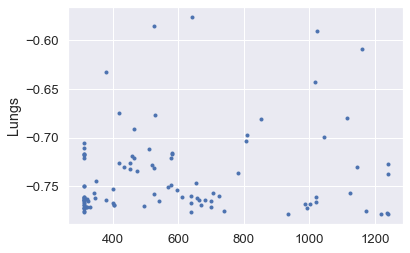

In [36]:
for ii in range(5):
    plt.figure()
    level = bayes.goal_df.iloc[ii]['AcceptanceLevel']
    #plt.plot(x_dummy[:,ii], (dummy.goal_dict[ii] - level)/level, '.')
    plt.plot(x_bayes[:,ii], (bayes.goal_dict[ii] - level)/level, '.')
    plt.ylabel(roi_list[ii])

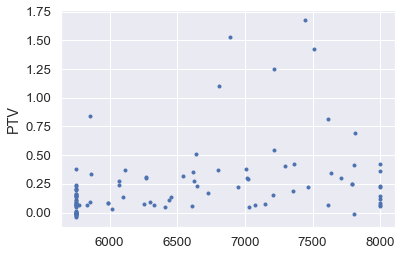

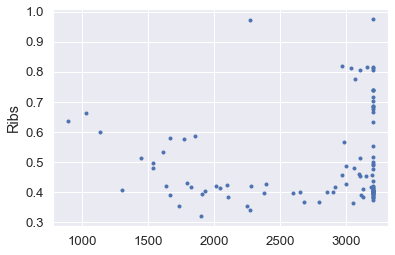

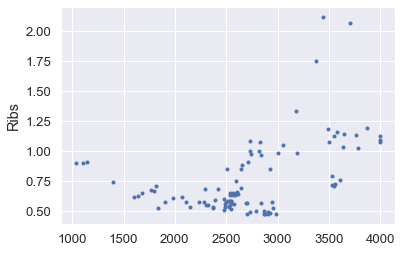

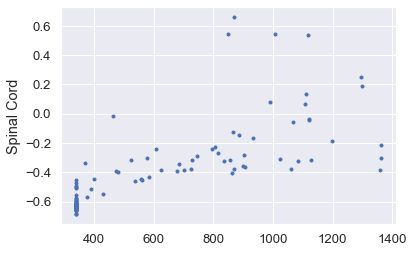

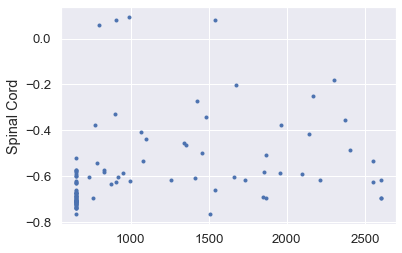

In [32]:
for ii in range(6,11):
    plt.figure()
    level = bayes.goal_df.iloc[ii]['AcceptanceLevel']
    #plt.plot(x_dummy[:,ii-1], (dummy.goal_dict[ii] - level)/level, '.')
    plt.plot(x_bayes[:,ii-1], (bayes.goal_dict[ii] - level)/level, '.')
    plt.ylabel(roi_list[ii-1])

In [47]:
1400*3/4

1050.0

In [40]:
bayes2 = np.load(folder + '/reduce/res_linquad_gp_minimize.pkl', allow_pickle=True)
x_bayes2 = np.array(bayes2.opt_result.x_iters)
x_bayes2.shape

(100, 4)

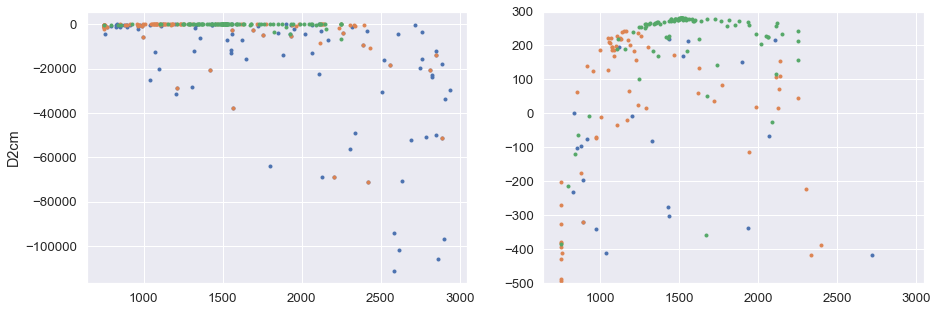

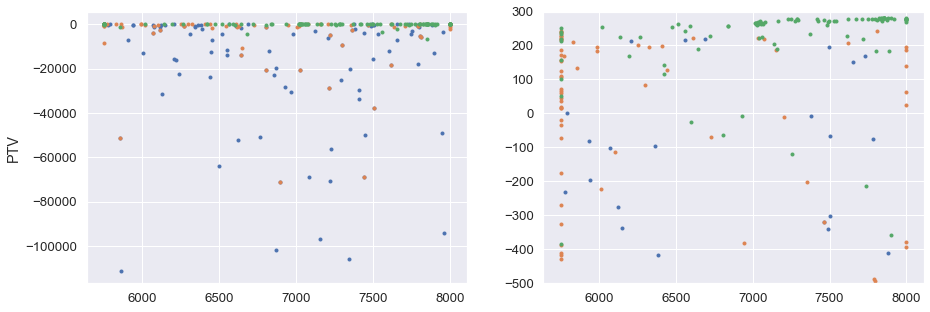

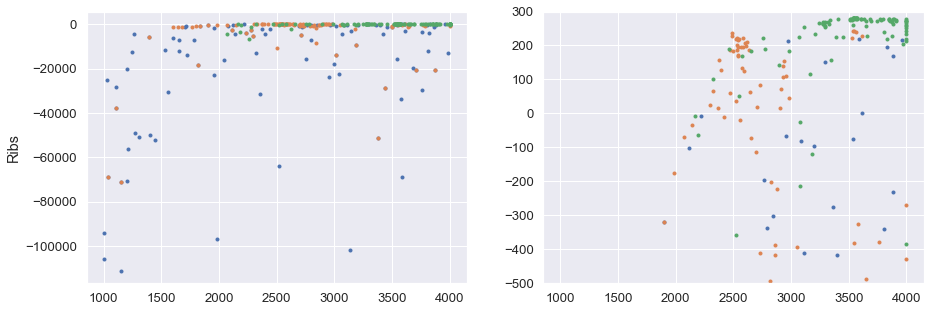

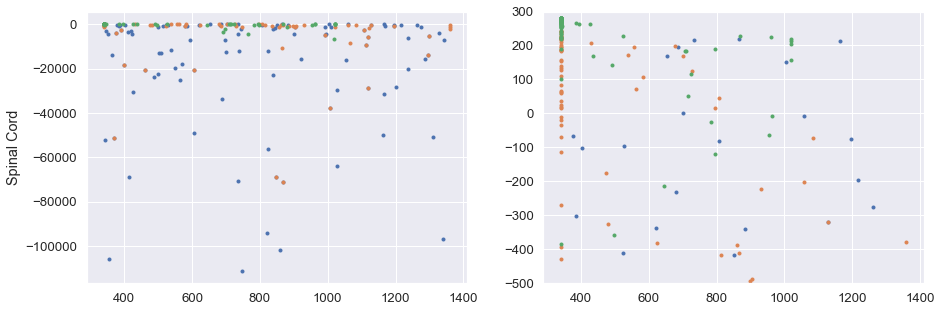

In [46]:
idx = [1, 5, 7, 8]
for ii in range(4):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(x_dummy[:,idx[ii]], -dummy.opt_result.func_vals, '.')
    ax[0].plot(x_bayes[:,idx[ii]], -bayes.opt_result.func_vals, '.')
    ax[0].plot(x_bayes2[:,ii], -bayes2.opt_result.func_vals, '.')
    ax[0].set_ylabel(roi_list[idx[ii]])
    ax[1].plot(x_dummy[:,idx[ii]], -dummy.opt_result.func_vals, '.')
    ax[1].plot(x_bayes[:,idx[ii]], -bayes.opt_result.func_vals, '.')
    ax[1].plot(x_bayes2[:,ii], -bayes2.opt_result.func_vals, '.')
    ax[1].set_ylim([-500, 300])

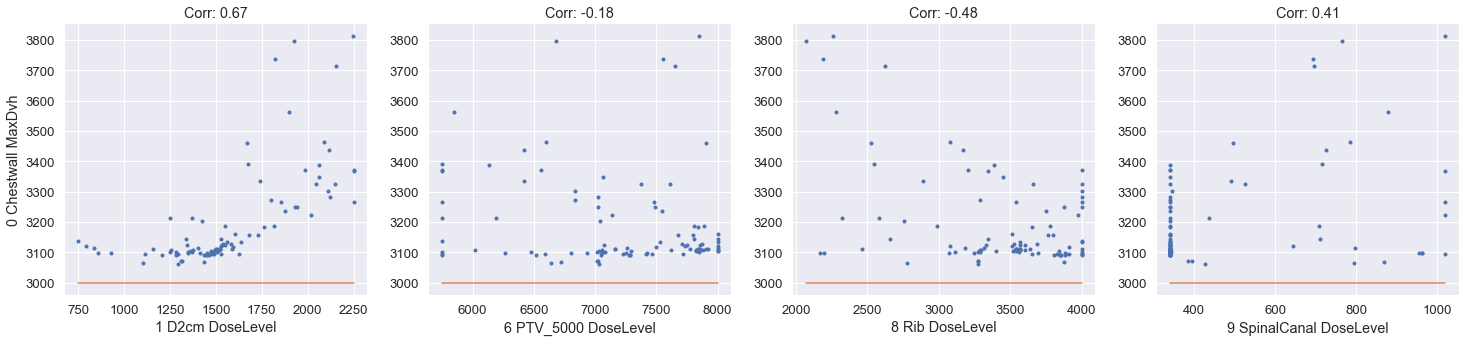

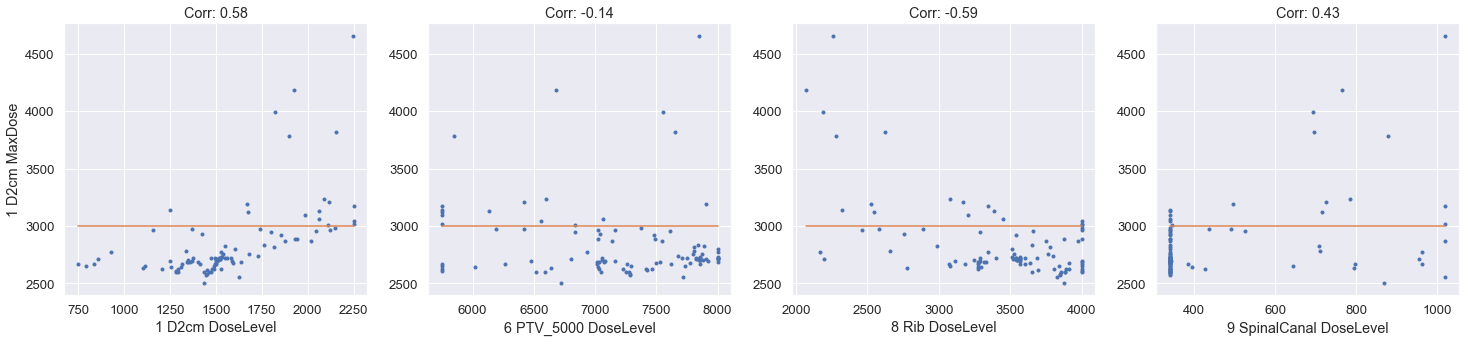

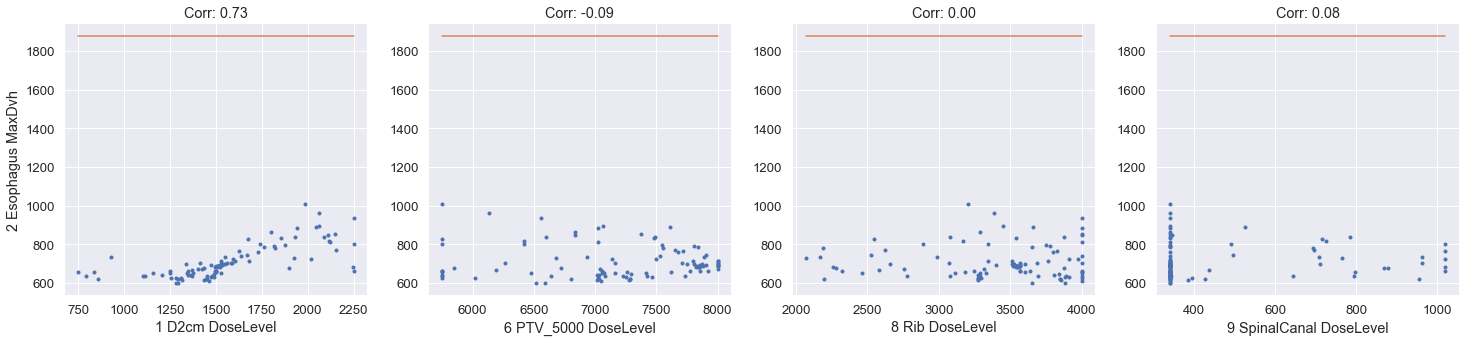

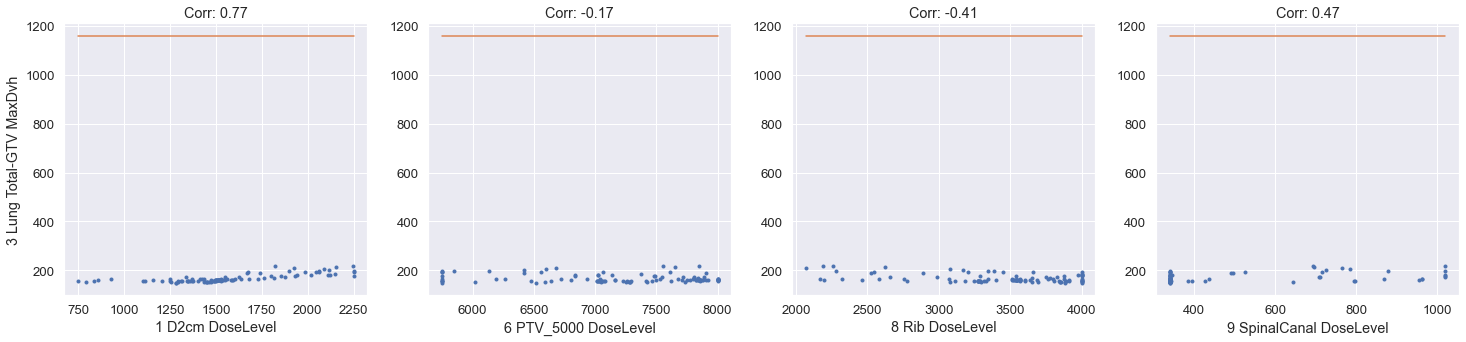

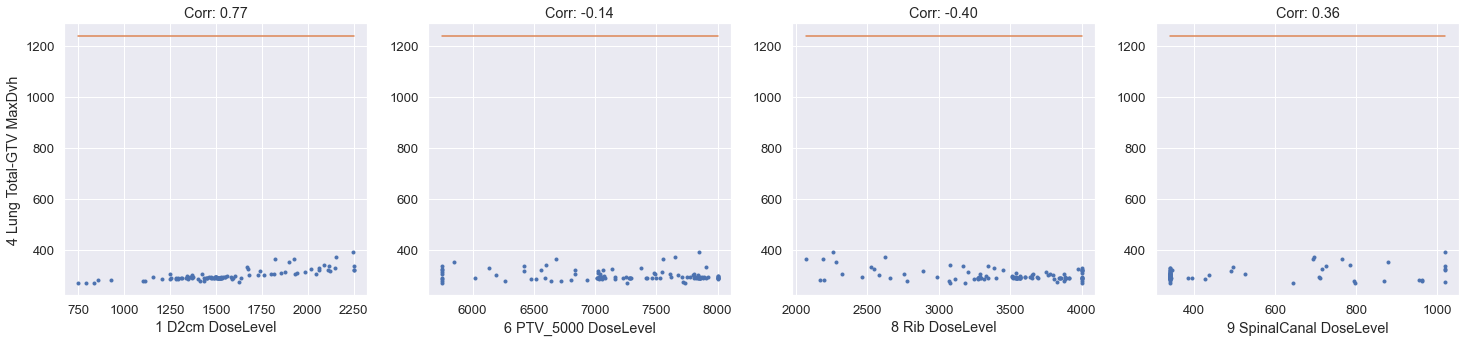

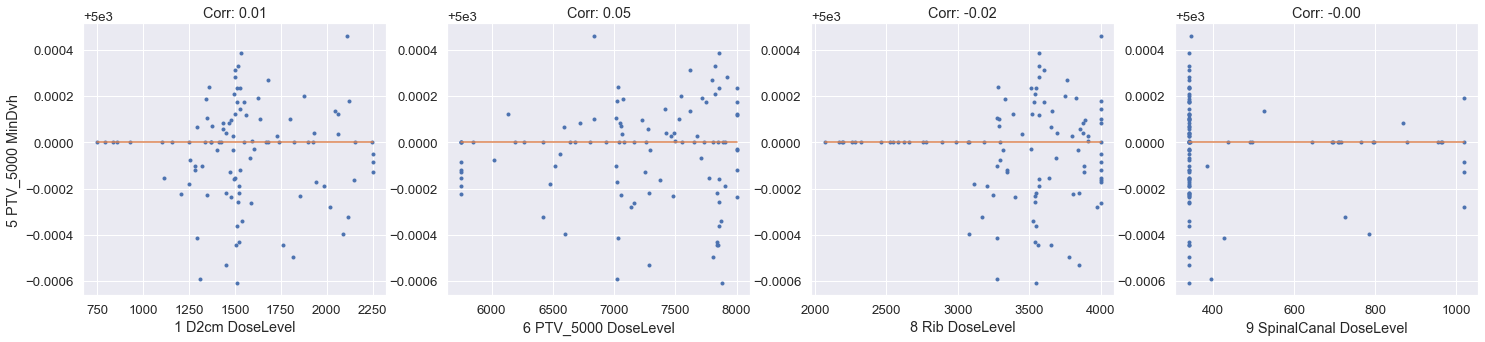

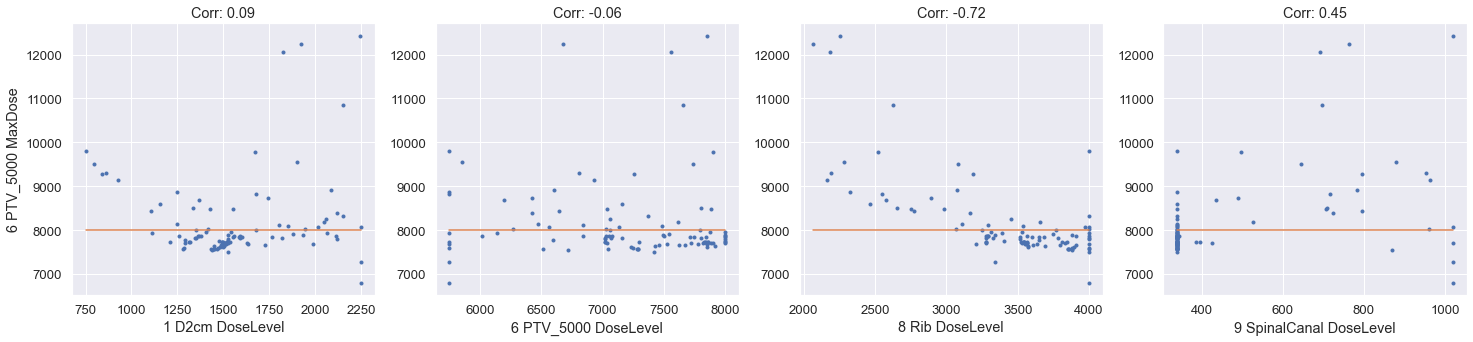

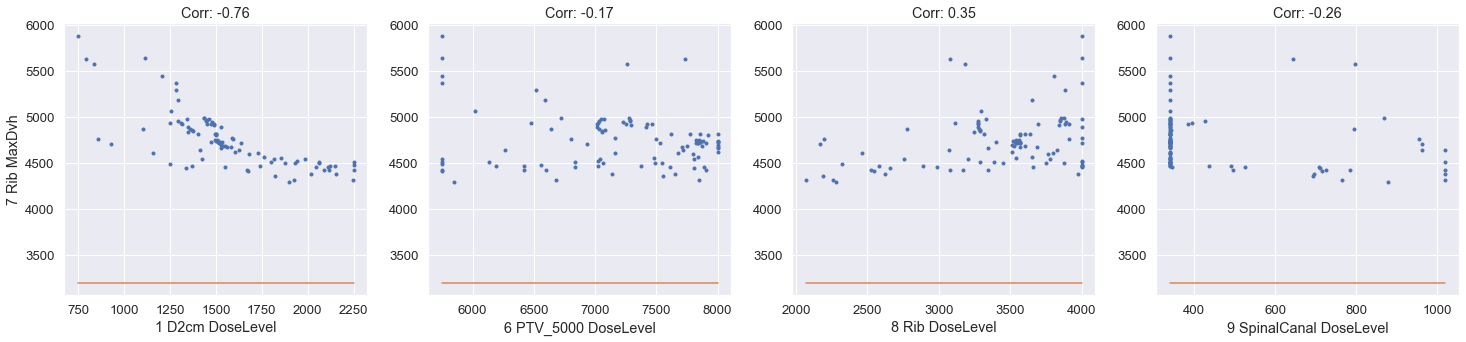

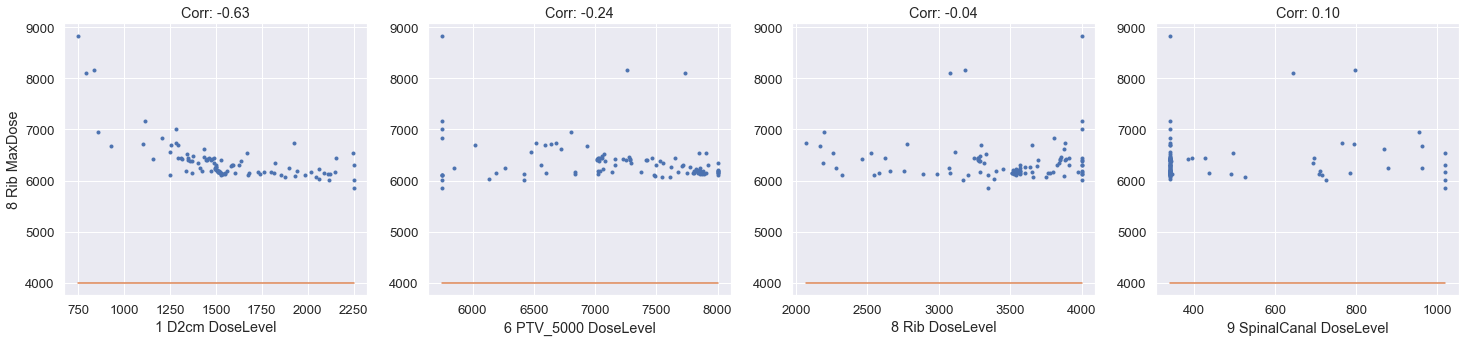

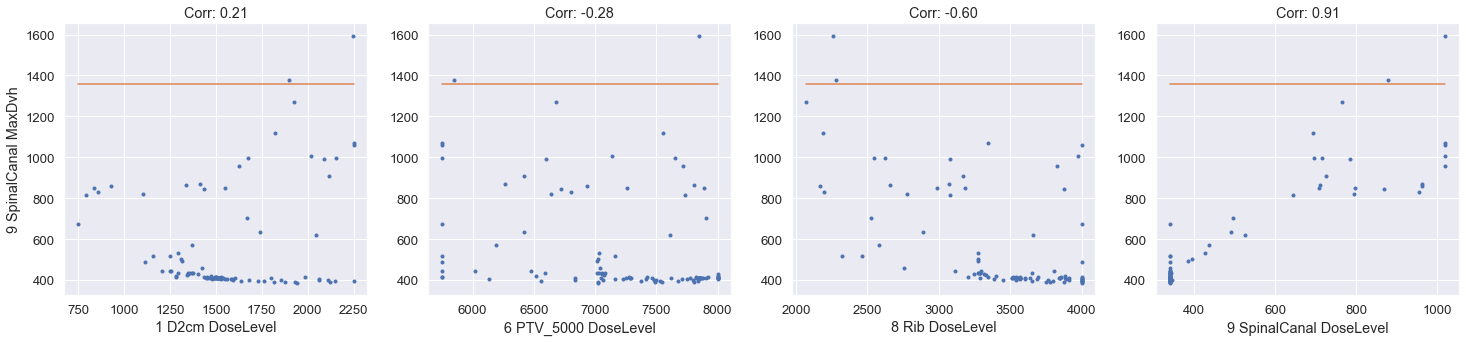

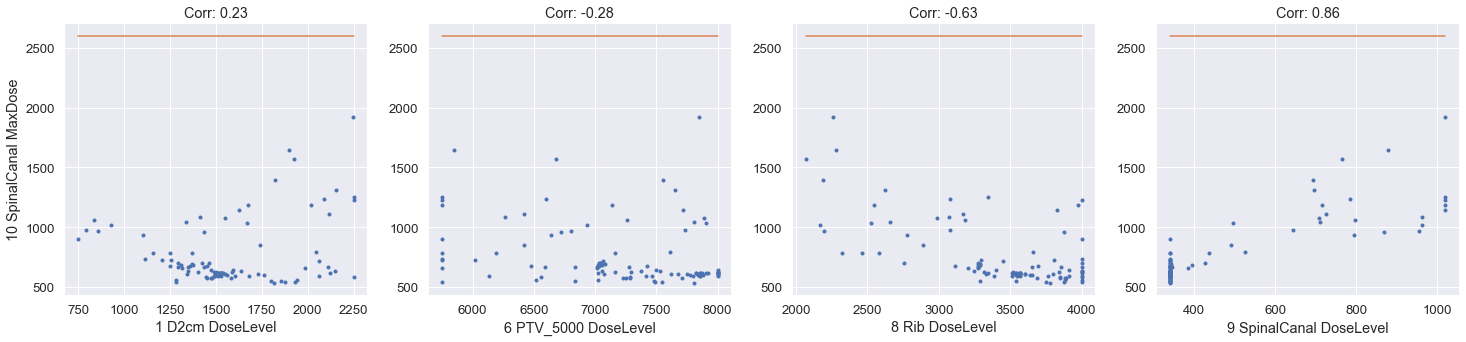

In [55]:
bayes2.scatterplot('pars')

In [56]:
bayes2.opt_result.x

[1513.205185916072, 7853.801305616365, 3548.536709360089, 340.0]

In [57]:
bayes.opt_result.x

[2981.2404882605642,
 1149.522337104297,
 470.0,
 290.0,
 1002.8875764537931,
 7807.828156170102,
 3200.0,
 3534.0740212886653,
 340.0,
 650.0]

In [84]:
folders = ['SBRT_lung_minsun', 'ZZ_MK_LLungSBRT3778', 'ZZ_MK_RLungSBRT4076', 'ZZ_MK_RULungSBRT3796', 'ZZ_MK_LLLungSBRT3977']
pars1 = []
pars2 = []
for folder in folders:
    random = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
    bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
    p = bayes.opt_result.x
    d = random.opt_result.x
    pars2.append(p.copy())
    pars2.append(d.copy())
    for ii in range(5):
        level = bayes.goal_df.iloc[ii]['AcceptanceLevel']
        p[ii] = 100*(p[ii] - level)/level
        d[ii] = 100*(d[ii] - level)/level
    level = bayes.goal_df.iloc[6]['AcceptanceLevel']
    level2 = bayes.goal_df.iloc[5]['AcceptanceLevel']
    p[5] = 100*(p[5] - level)/(level - level2)
    d[5] = 100*(d[5]- level)/(level - level2)
    for ii in range(7,11):
        level = bayes.goal_df.iloc[ii]['AcceptanceLevel']
        p[ii-1] = 100*(p[ii-1] - level)/level
        d[ii-1] = 100*(d[ii-1] - level)/level
    pars1.append(p)
    pars1.append(d)

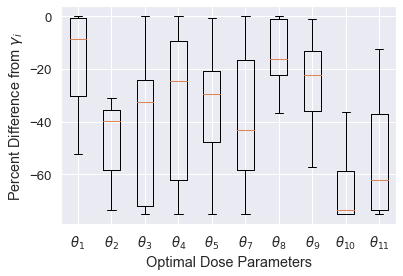

In [76]:
plt.figure()
plt.boxplot(np.array(pars1));
plt.xlabel('Optimal Dose Parameters')
plt.ylabel('Percent Difference from $\gamma_i$')
plt.xticks(np.arange(1, 11), [r'$\theta_1$', r'$\theta_2$', r'$\theta_3$', r'$\theta_4$', r'$\theta_5$', r'$\theta_7$', r'$\theta_8$', r'$\theta_9$', r'$\theta_{10}$', r'$\theta_{11}$']);
plt.savefig('doseParameters_labels.png', dpi=300, bbox_inches='tight')

In [69]:
len(bayes.opt_result.x)

10

In [48]:
pars1 = []
for folder in folders:
    random = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
    bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
    p = bayes.opt_result.x
    d = random.opt_result.x
    pars1.append(p[5])
    pars1.append(d[5])

In [85]:
pars2 = np.array(pars2)

In [87]:
pars2[:,5]

array([5600.        , 7454.84102448, 5600.        , 6466.44191792,
       8000.        , 7470.80046364, 6638.7288323 , 6024.82249291,
       7807.82815617, 6688.36047475])

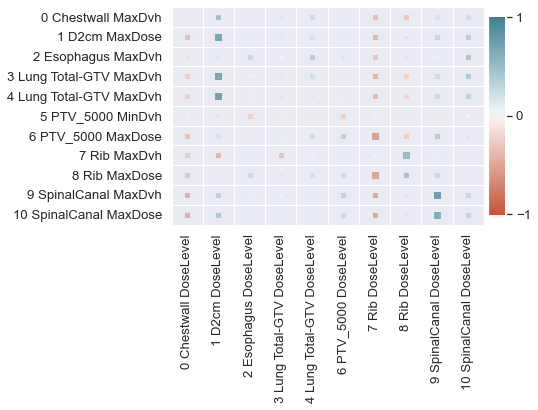

In [88]:
bayes.corrplot('pars')

In [20]:
folder = 'ZZ_MK_LLLungSBRT3977'
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)

from skopt import plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13ce597d0>,
      dtype=object)

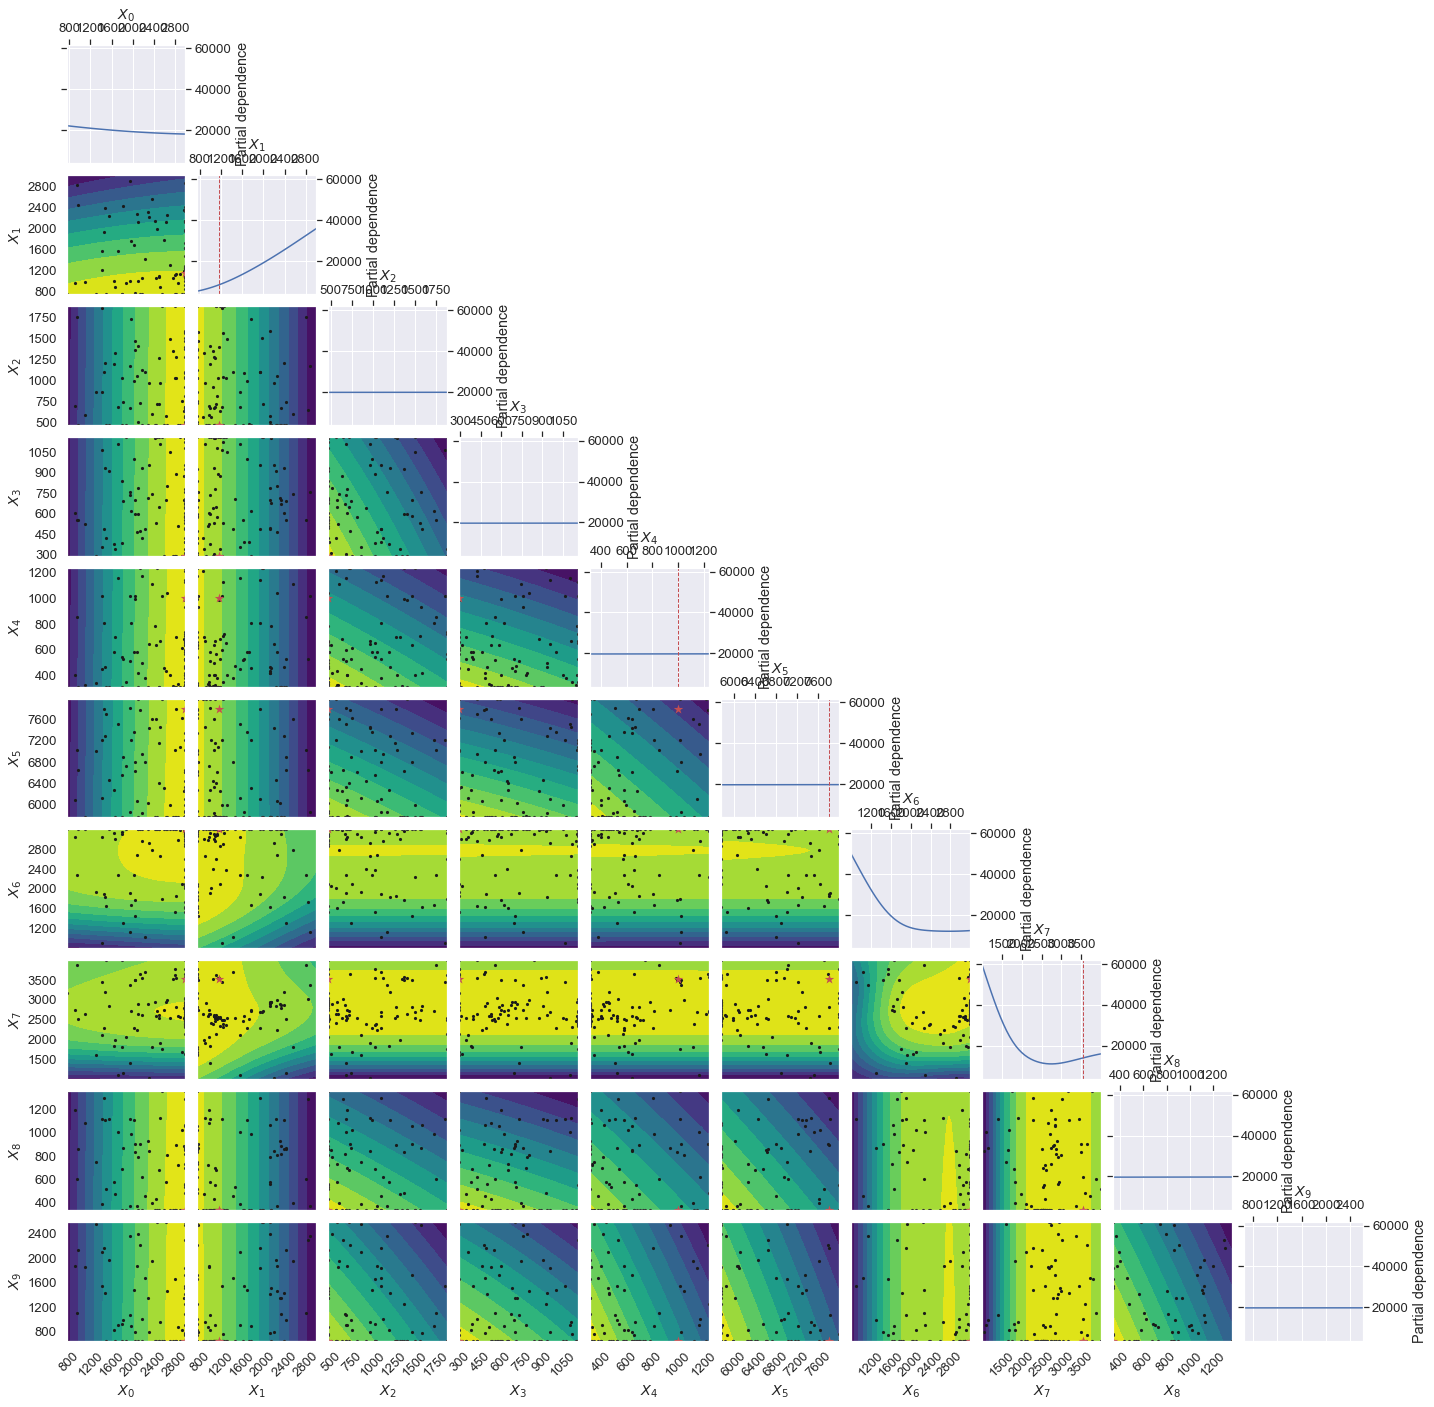

In [23]:
plots.plot_objective(bayes.opt_result)

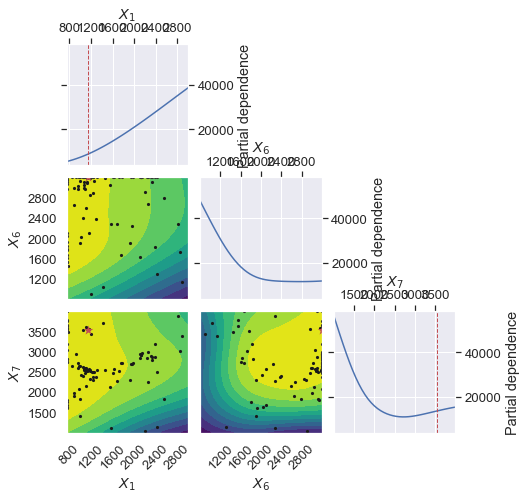

In [24]:
plots.plot_objective(bayes.opt_result, plot_dims=[1, 6, 7]);

In [25]:
bayes.goal_df

Roi     Type GoalCriteria  AcceptanceLevel  ParameterValue  \
0        Chestwall   MaxDvh       AtMost             3000            5.28   
1             D2cm  MaxDose       AtMost             3000             NaN   
2        Esophagus   MaxDvh       AtMost             1880           21.76   
3   Lung Total-GTV   MaxDvh       AtMost             1160           53.71   
4   Lung Total-GTV   MaxDvh       AtMost             1240           35.80   
5         PTV_5000   MinDvh      AtLeast             5000           95.00   
6         PTV_5000  MaxDose       AtMost             8000             NaN   
7              Rib   MaxDvh       AtMost             3200            1.75   
8              Rib  MaxDose       AtMost             4000             NaN   
9      SpinalCanal   MaxDvh       AtMost             1360            2.41   
10     SpinalCanal  MaxDose       AtMost             2600             NaN   

    Weight             Shape  
0        1            linear  
1        1  linear_quadratic  
2        1  linear_quadratic  
3        1  linear_quadratic  
4        1  linear_quadratic  
5        1  linear_quadratic  
6        1  linear_quadratic  
7        1            linear  
8        1            linear  
9        1  linear_quadratic  
10       1  linear_quadratic

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1200da5d0>,
      dtype=object)

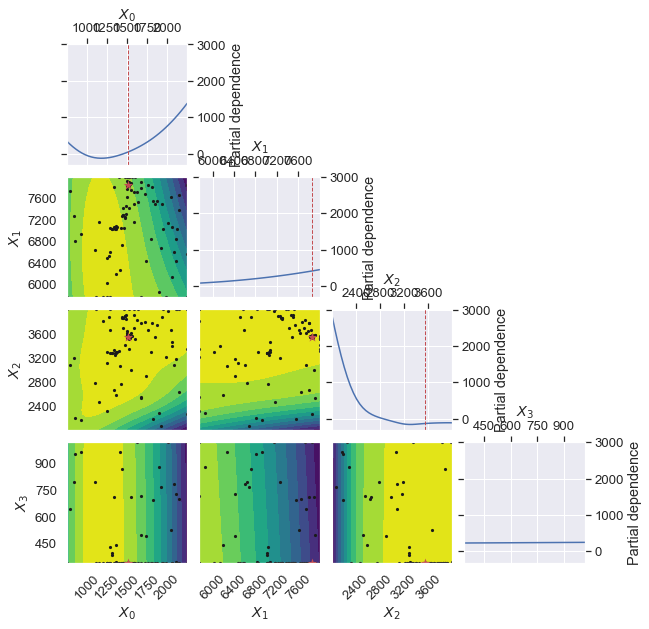

In [6]:
folder = 'ZZ_MK_LLLungSBRT3977'
bayes = np.load(folder + '/reduce/res_linquad_gp_minimize.pkl', allow_pickle=True)
plots.plot_objective(bayes.opt_result)

In [11]:
bayes.goal_df = pd.read_csv(folder + '/reduce/goals_linquad.csv')
bayes.func_df = raybay.get_funcs(folder + '/reduce/funcs.csv')

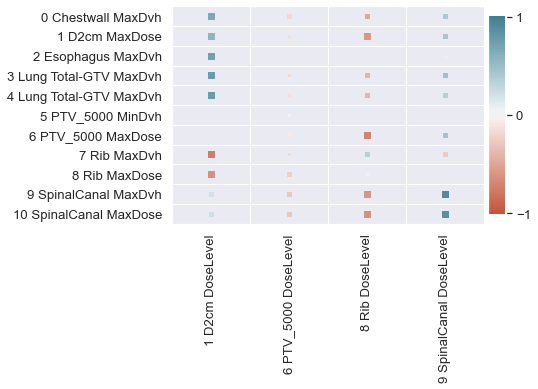

In [12]:
bayes.corrplot('pars')